In [115]:
# keep this function handy for all network visualizations in all chapters

def draw_graph(G, show_names=False, node_size=1, font_size=10, edge_width=0.5): 

    import numpy as np
    import networkx as nx
    
    from IPython.display import SVG 
    from sknetwork.visualization import svg_graph 
    from sknetwork.data import Bunch 
    from sknetwork.ranking import PageRank 

    adjacency = nx.to_scipy_sparse_matrix(G, nodelist=None, dtype=None, weight='weight', format='csr') 

    names = np.array(list(G.nodes())) 

    graph = Bunch() 
    graph.adjacency = adjacency 
    graph.names = np.array(names) 

    pagerank = PageRank() 

    scores = pagerank.fit_transform(adjacency) 

    if show_names: 
        
        image = svg_graph(graph.adjacency, font_size=font_size, node_size=node_size, names=graph.names, width=700, height=500, scores=scores, edge_width=edge_width) 

    else: 

        image = svg_graph(graph.adjacency, node_size=node_size, width=700, height=500, scores = scores, edge_width=edge_width) 

    return SVG(image) 

# creating a graph from an edgelist

In [116]:
import pandas as pd 
import networkx as nx 

In [117]:
data = 'https://raw.githubusercontent.com/itsgorain/datasets/main/networks/alice/edgelist_alice_original.csv' 

network_df = pd.read_csv(data) 

network_df.head() 

source     target
0       Rabbit      Alice
1    Longitude      Alice
2  New Zealand      Ma'am
3  New Zealand  Australia
4       Fender      Alice

In [7]:
network_df.shape

(108, 2)

# creating different types of graphs

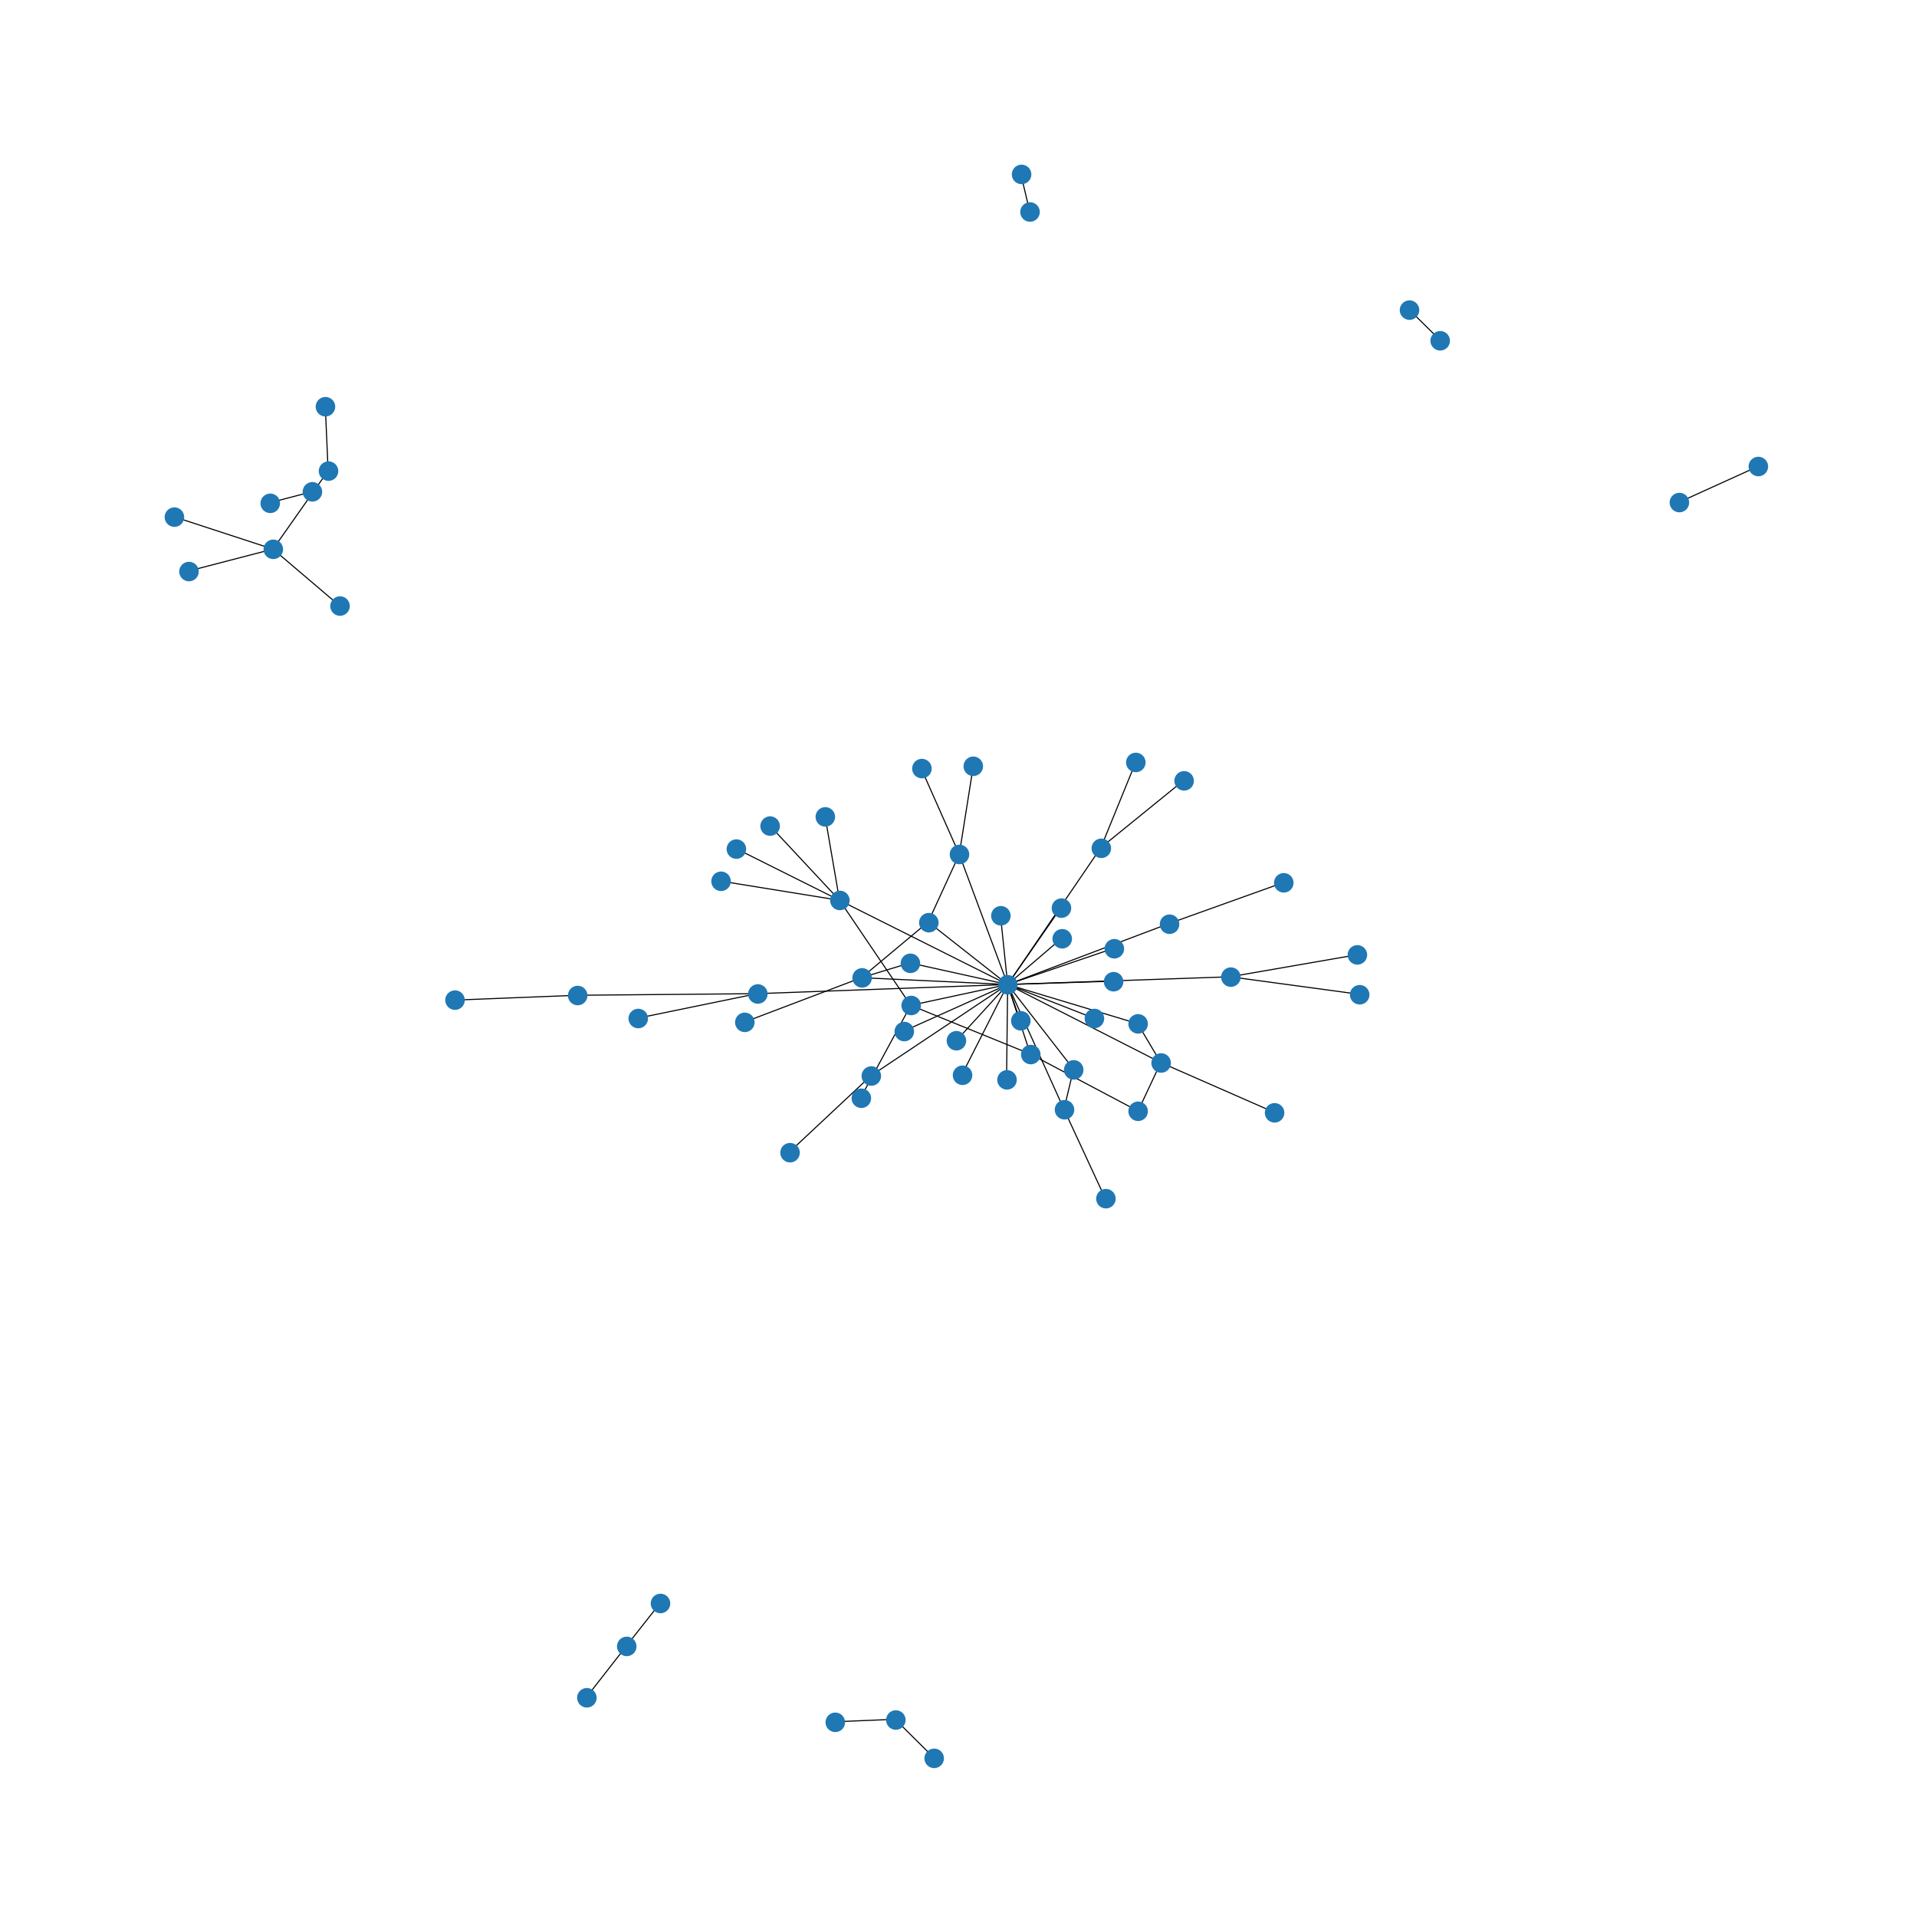

In [118]:
import matplotlib.pyplot as plt
G = nx.from_pandas_edgelist(network_df) 
plt.figure(figsize=(25,25)) 
nx.draw(G)
plt.show()

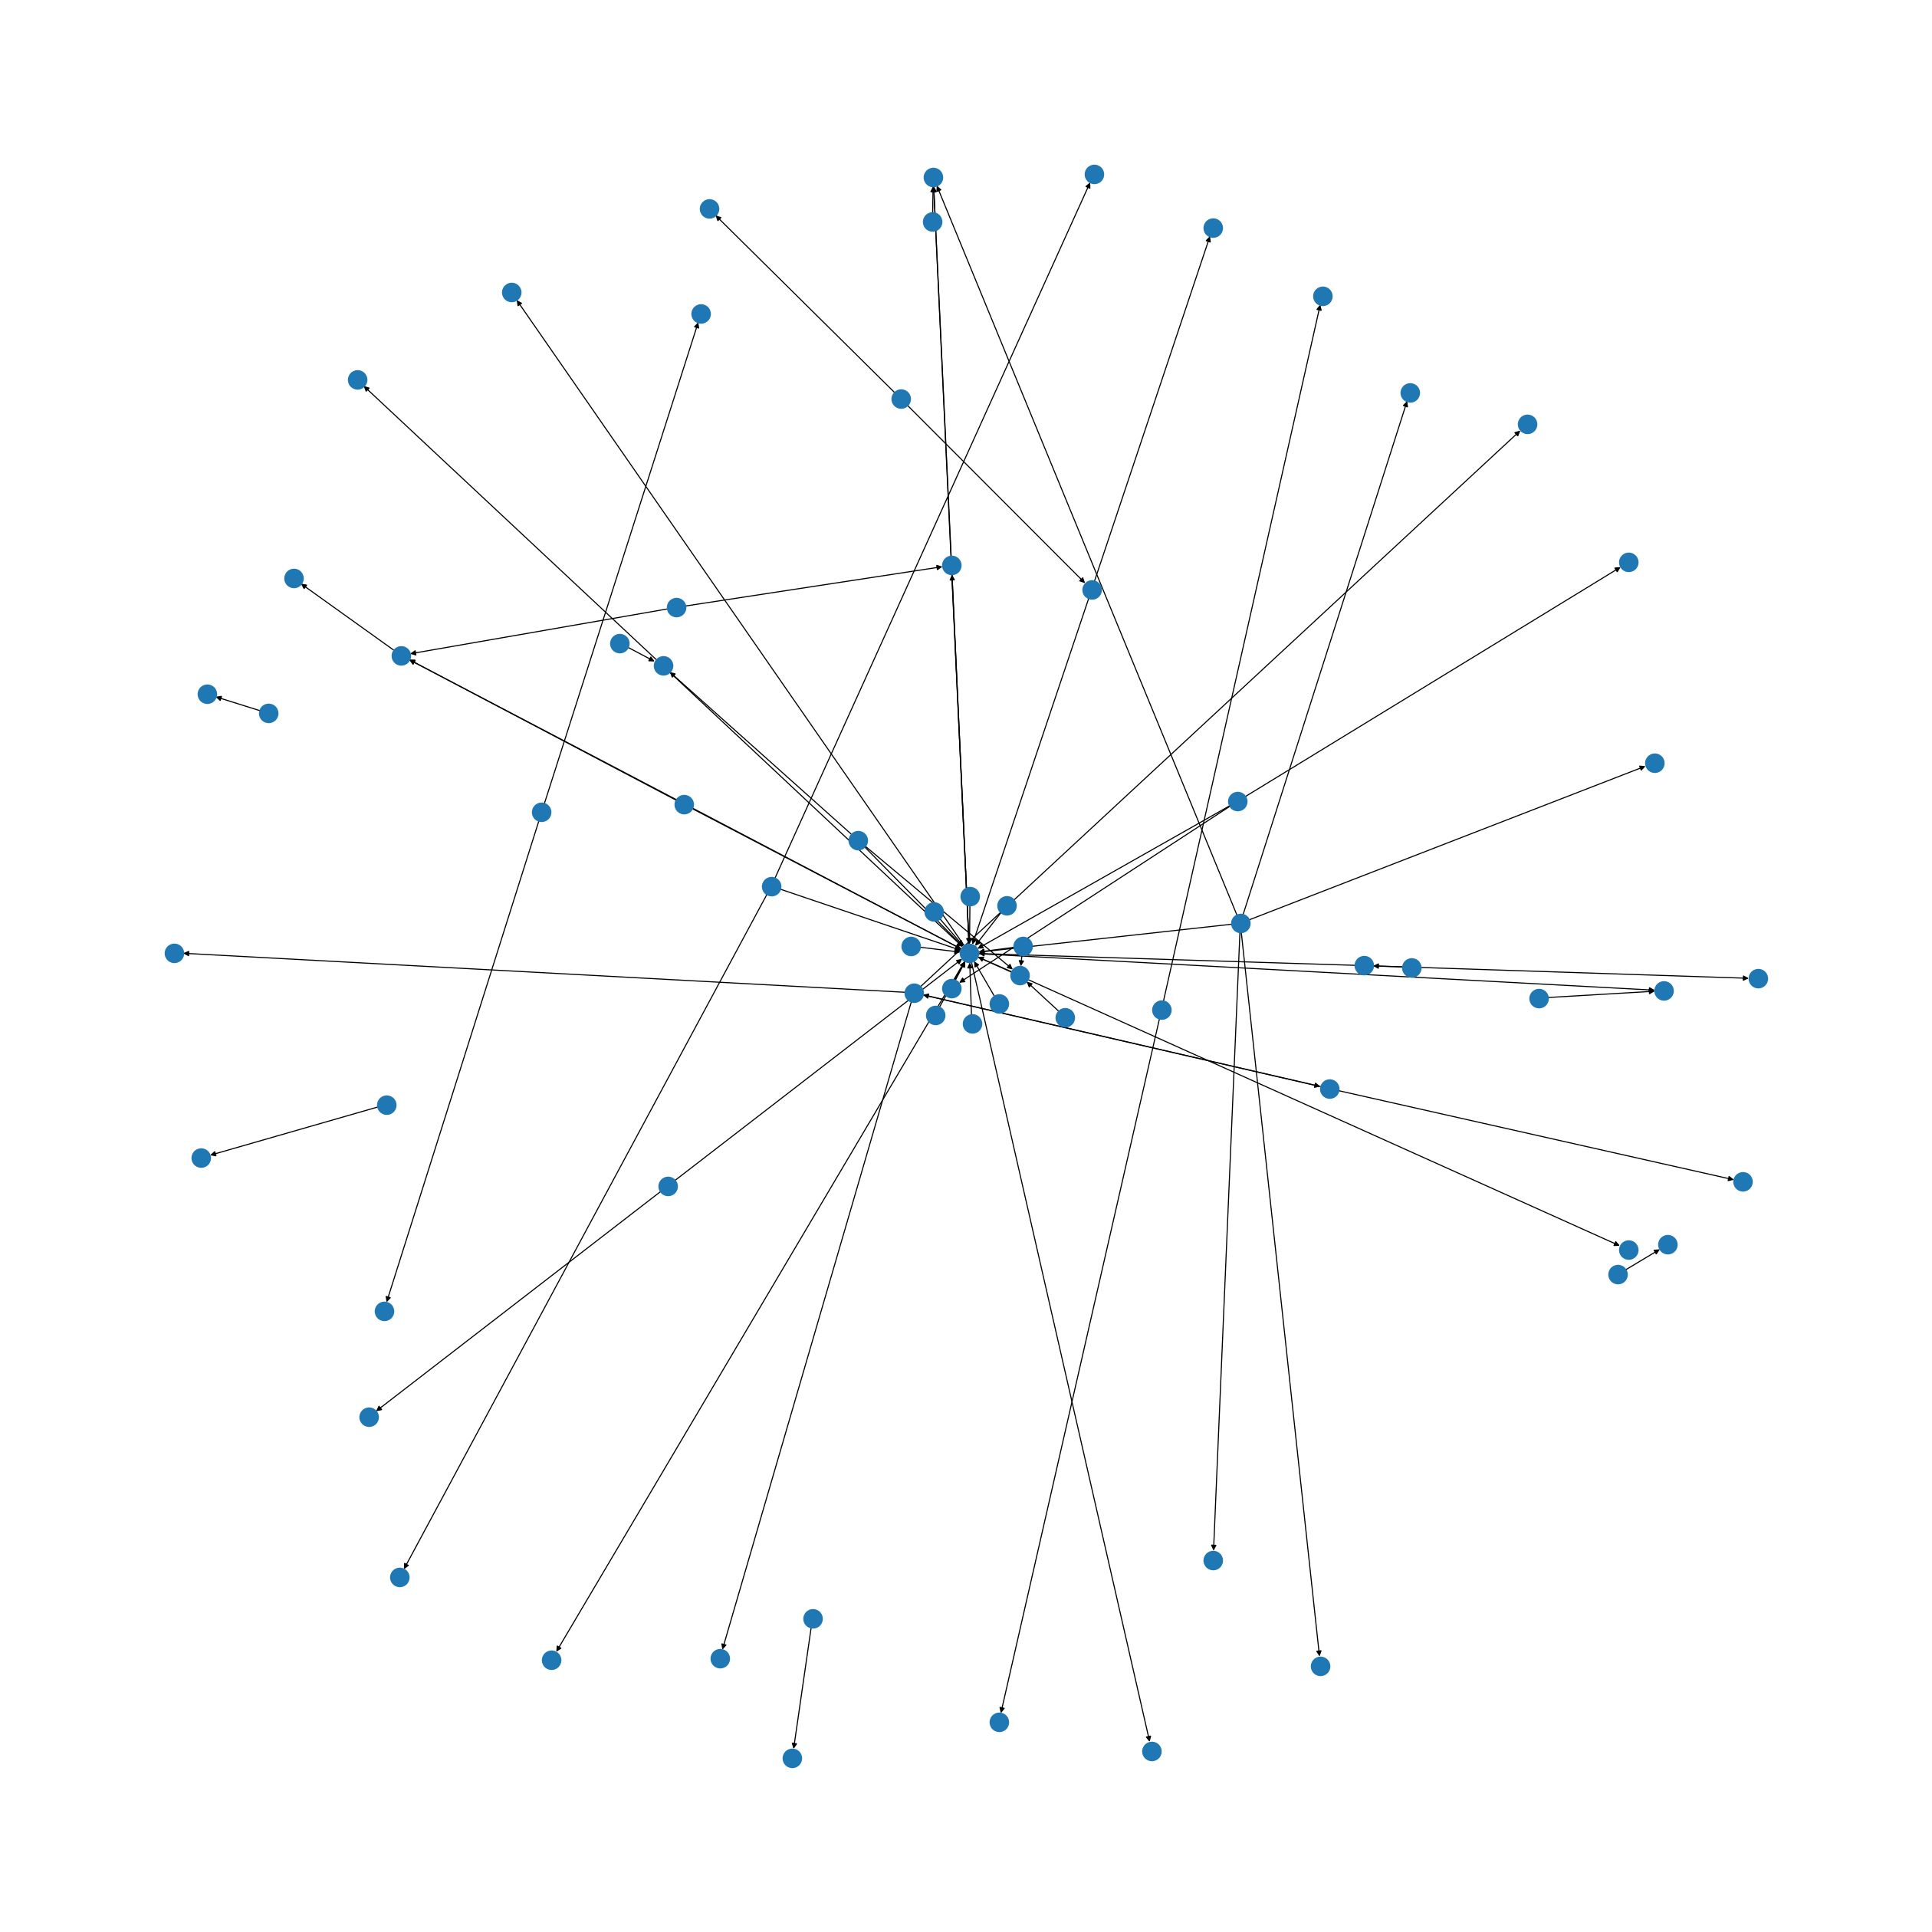

In [119]:
G = nx.from_pandas_edgelist(network_df, create_using=nx.DiGraph) 
plt.figure(figsize=(25,25)) 
nx.draw(G)
plt.show()

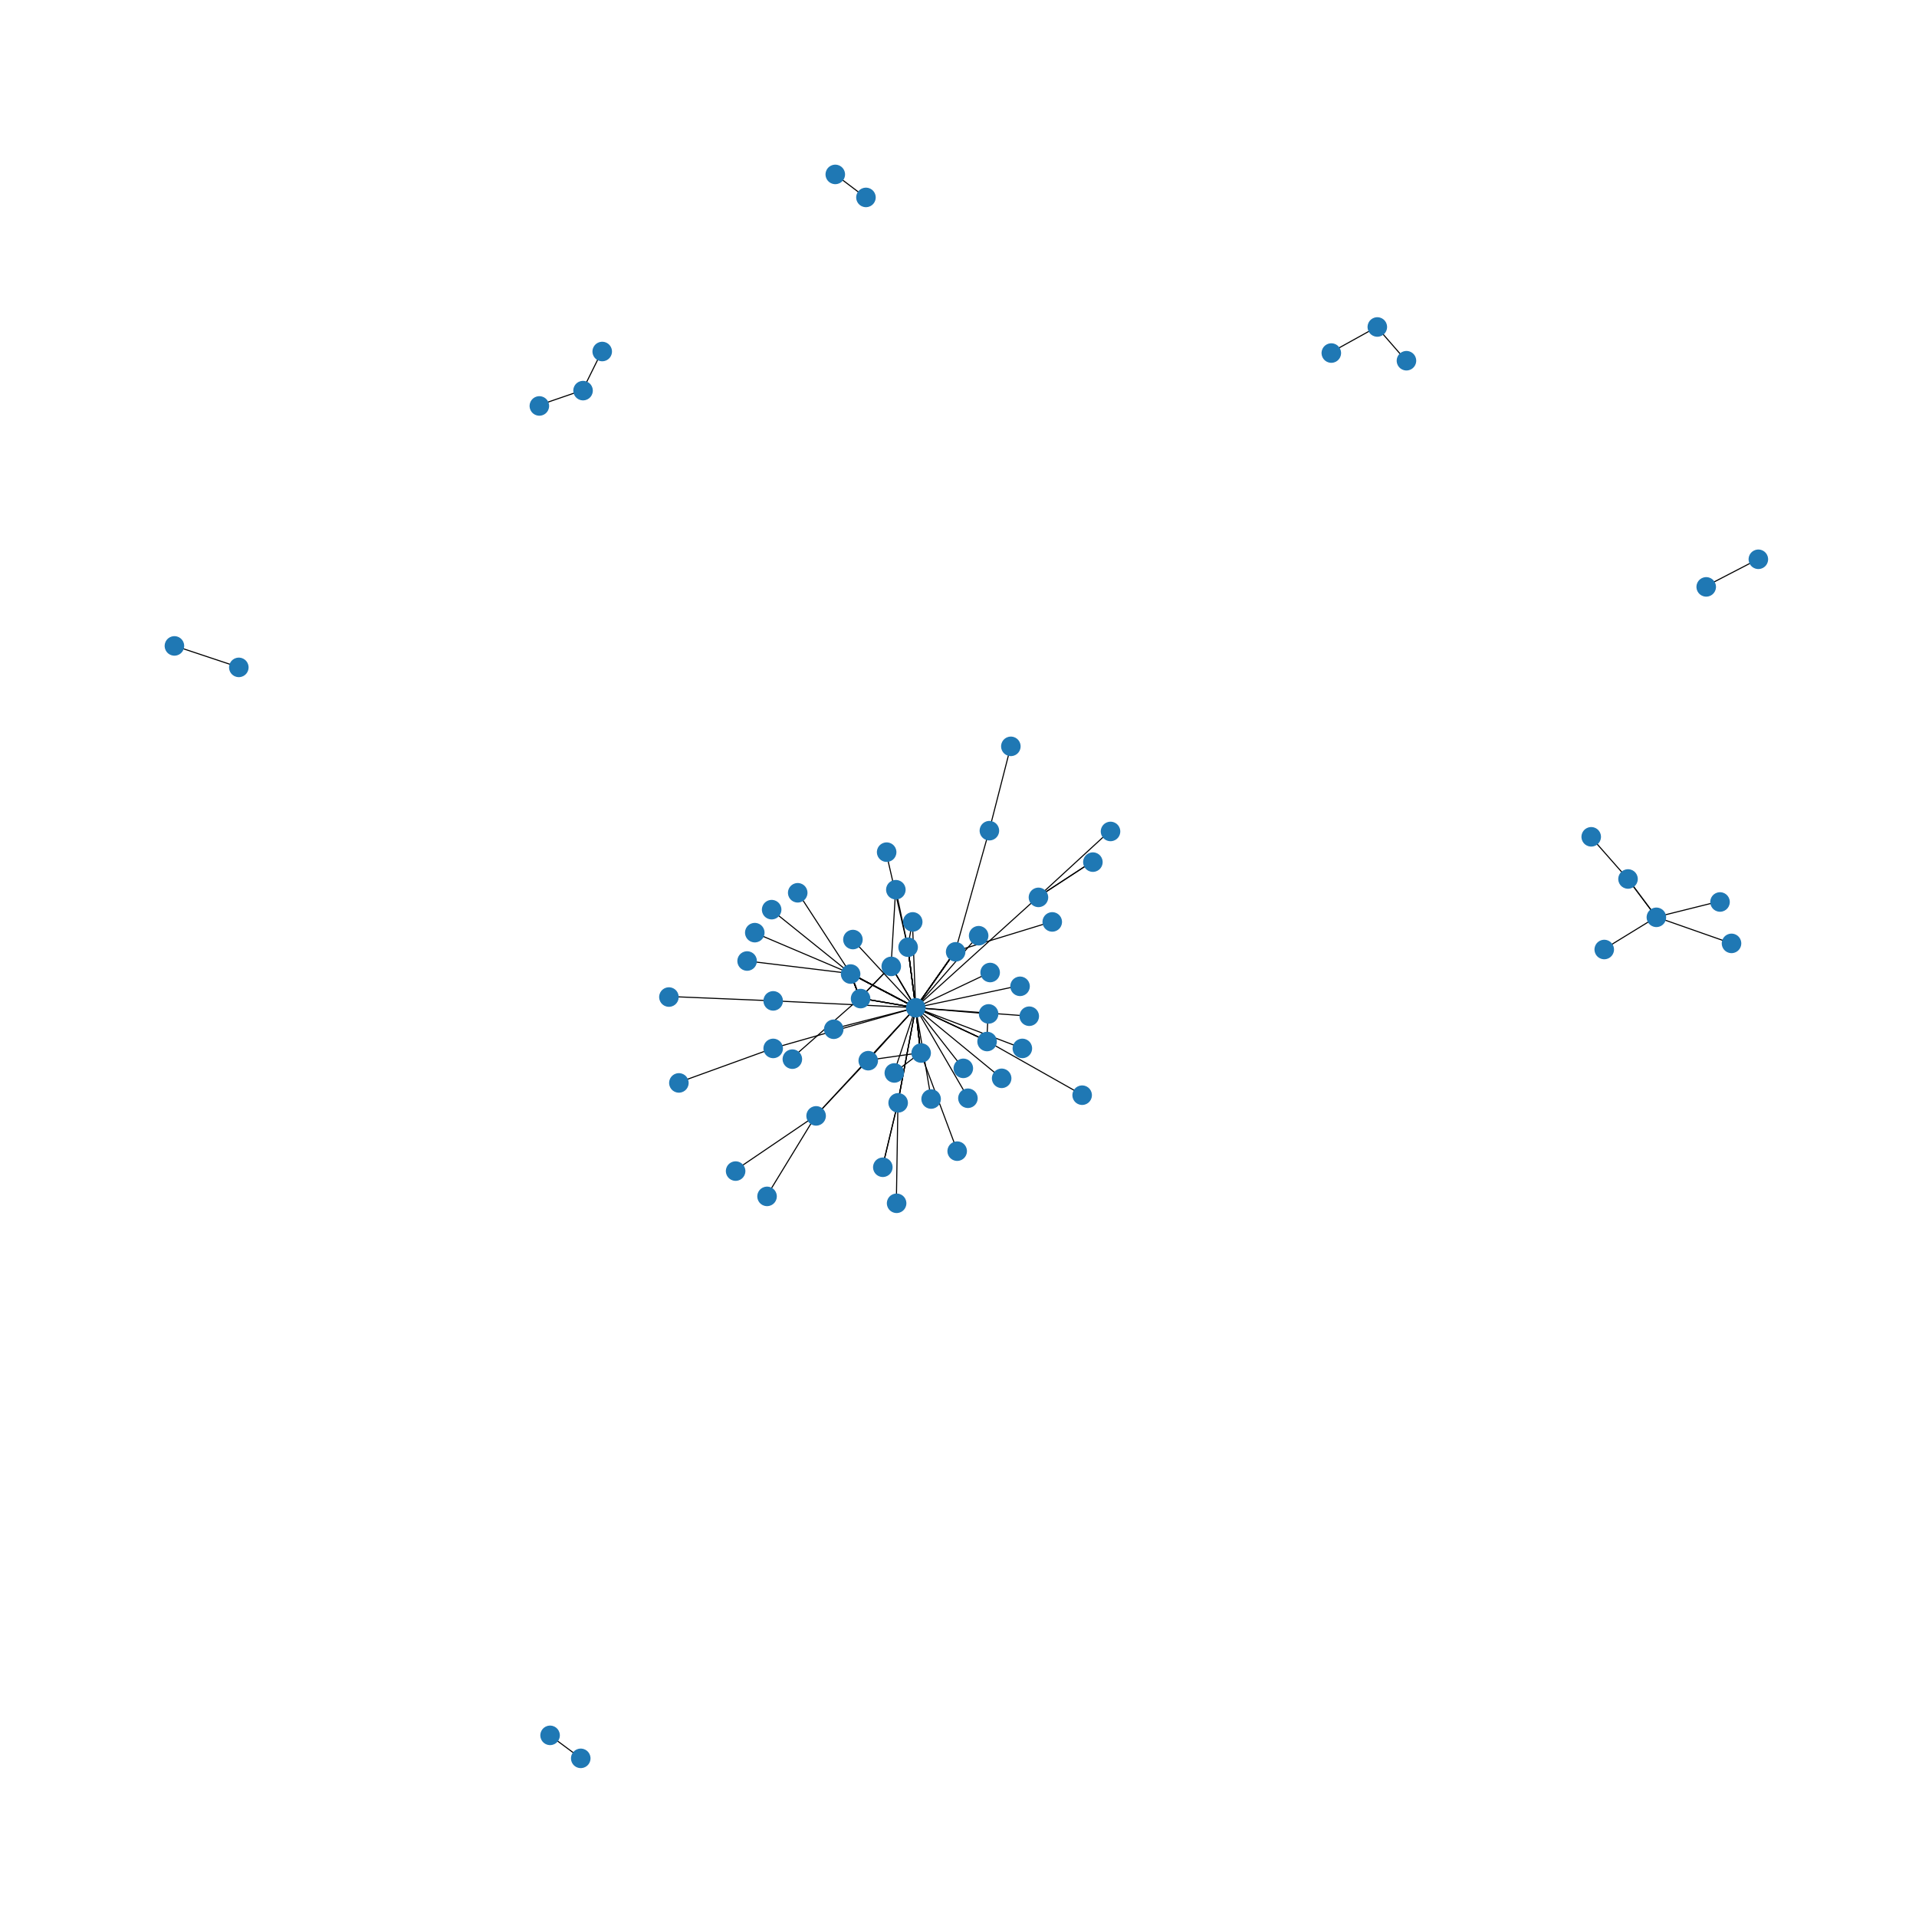

In [22]:
G = nx.from_pandas_edgelist(network_df, create_using=nx.MultiGraph) 
plt.figure(figsize=(25,25)) 
nx.draw(G)
plt.show()

# summarizing graphs

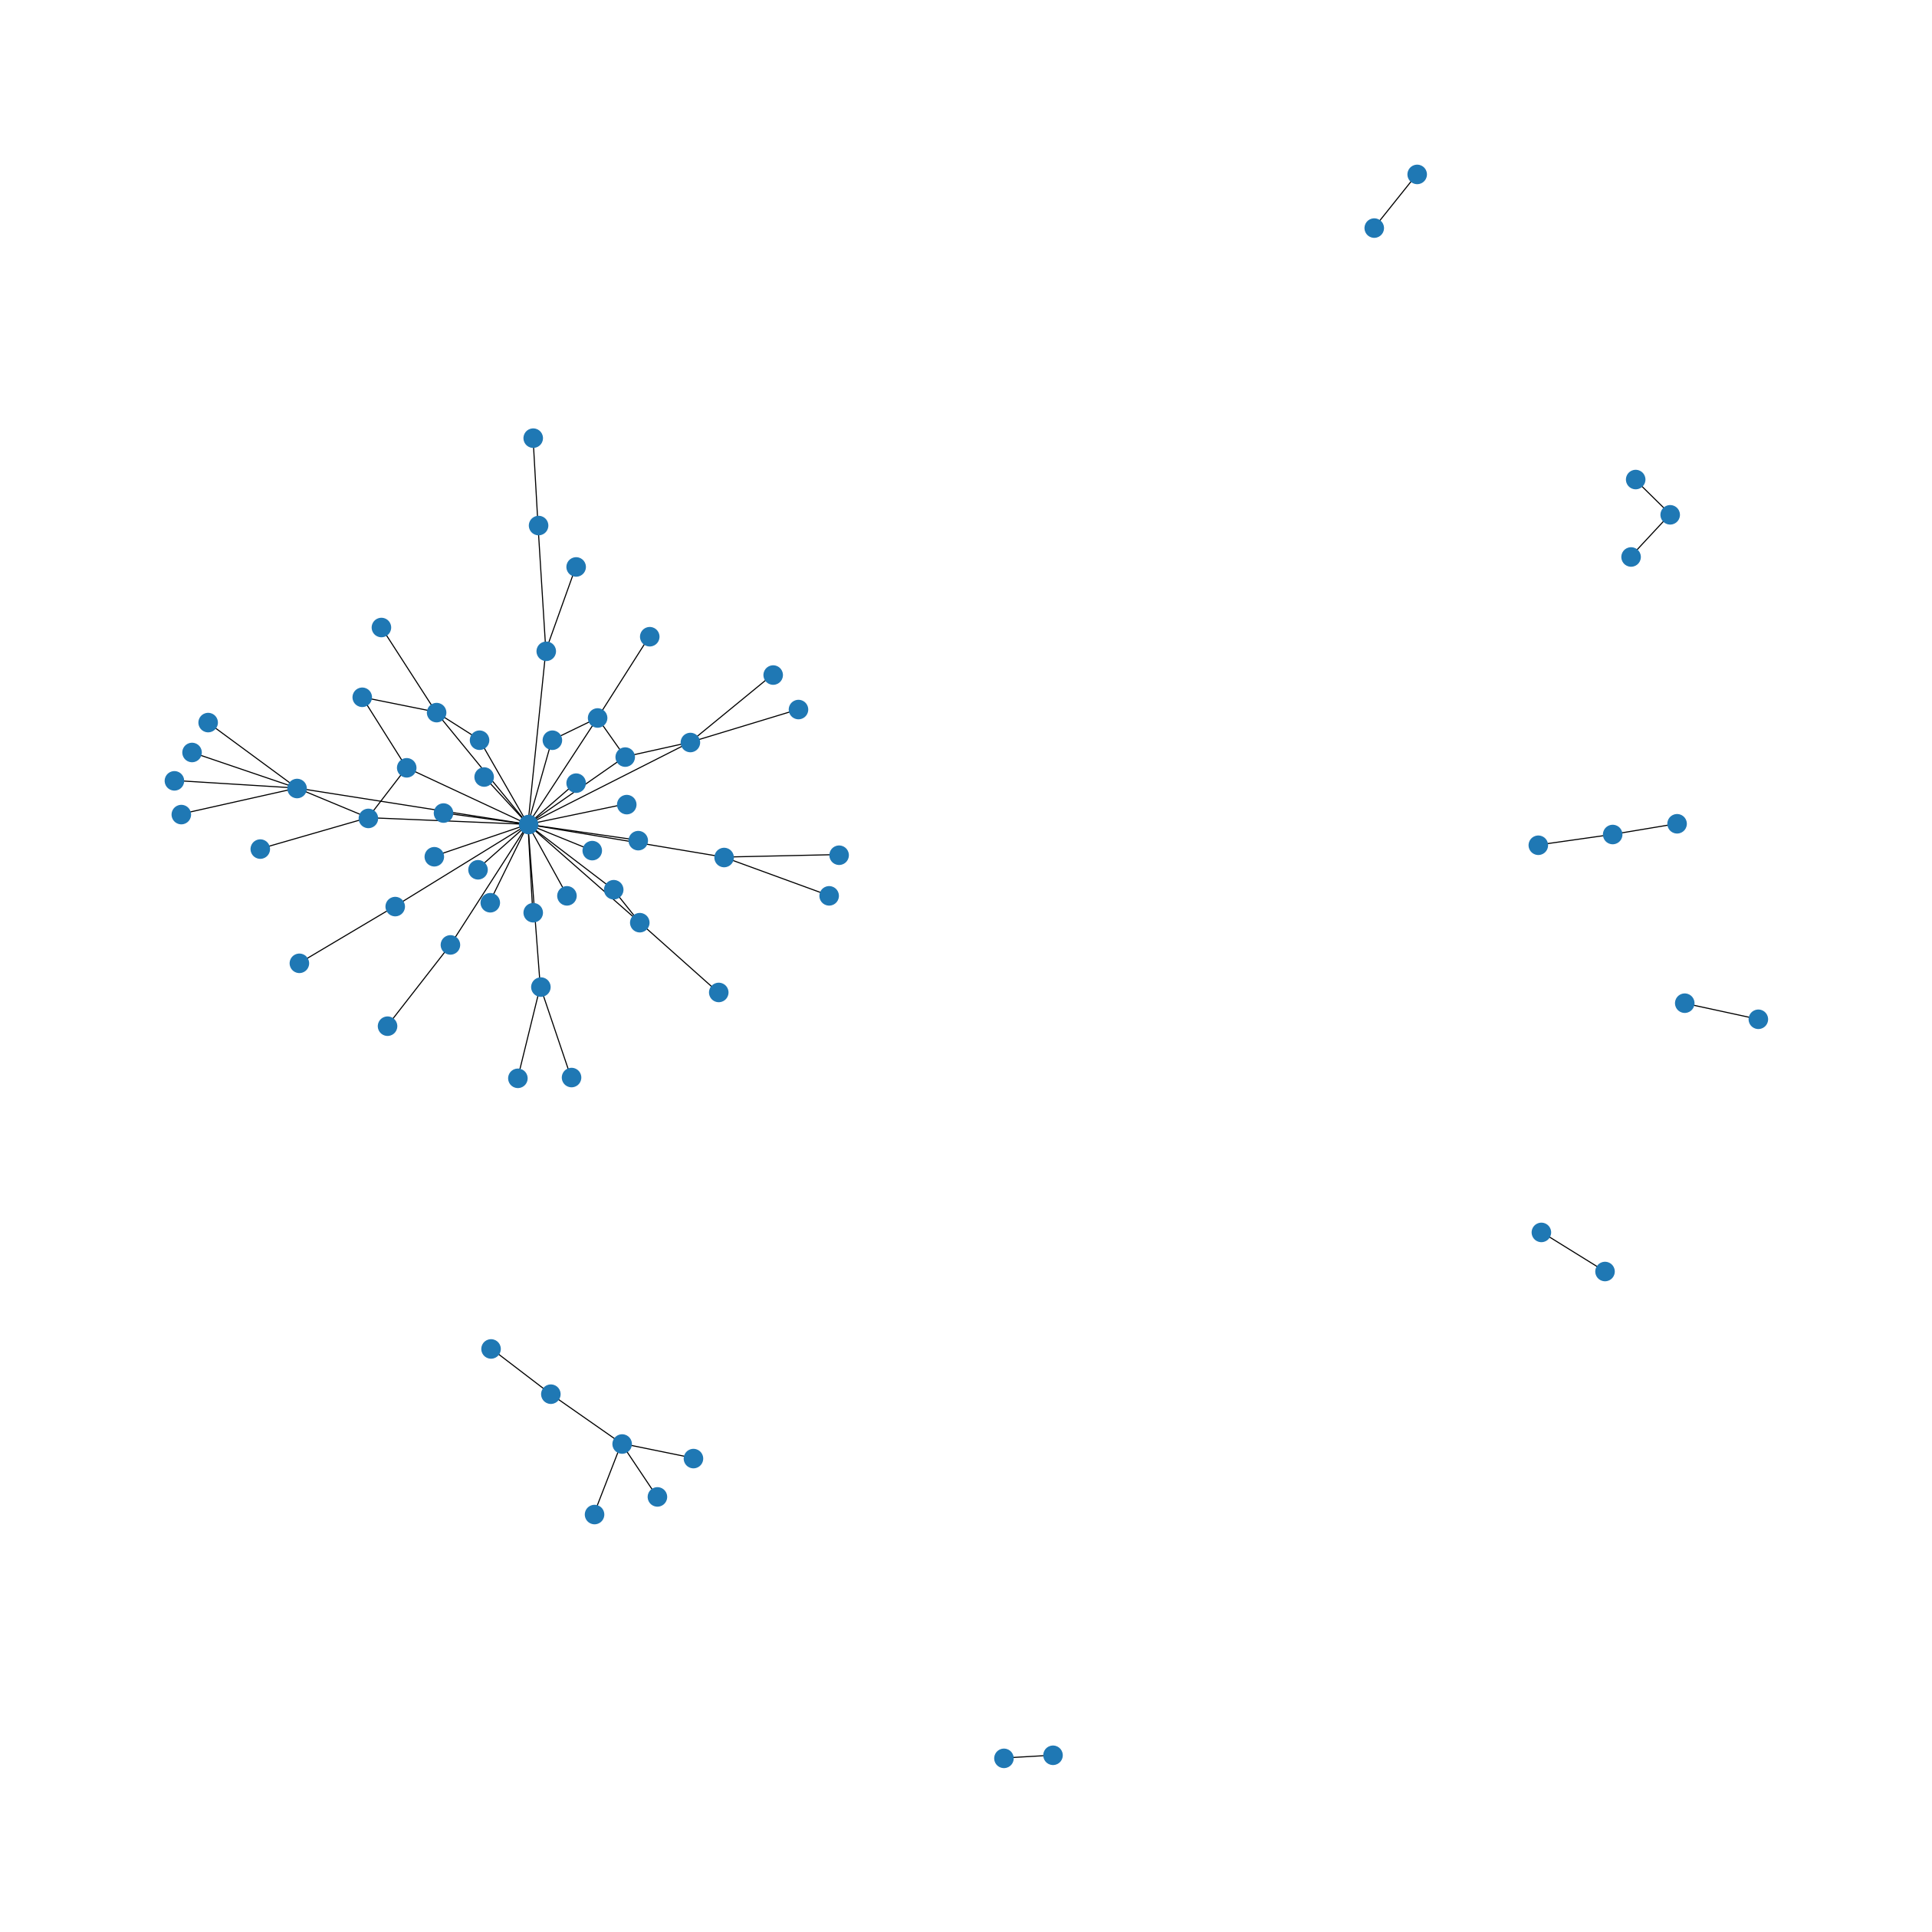

In [120]:
G = nx.from_pandas_edgelist(network_df) 
plt.figure(figsize=(25,25)) 
nx.draw(G)
plt.show()

In [14]:
print(nx.info(G)) 

Graph with 68 nodes and 68 edges


/var/folders/sz/3pgn8fsd6v5g9t57hwhf_3sw0000gn/T/ipykernel_5633/2822808291.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


# listing nodes

In [24]:
G.nodes

NodeView(('Rabbit', 'Alice', 'Longitude', 'New Zealand', "Ma'am", 'Australia', 'Fender', 'Ada', 'Mabel', 'Paris', 'Rome', 'London', 'Improve', 'Nile', 'William the Conqueror', 'Mouse', 'Lory', 'Eaglet', 'Northumbria', 'Edwin', 'Morcar', 'Stigand', 'Mercia', 'Canterbury', 'â\x80\x98it', 'William', 'Edgar Atheling', "â\x80\x98I'll", 'Said', 'Crab', 'Dinah', 'the White Rabbit', 'Bill', 'The Rabbit Sends', 'Mary Ann', 'Pat', 'Caterpillar', 'CHAPTER V.', 'William_', 'Pigeon', 'Fish-Footman', 'Duchess', 'Cheshire', 'Hare', 'Dormouse', 'Hatter', 'Time', 'Tillie', 'Elsie', 'Lacie', 'Treacle', 'Kings', 'Queens', 'Cat', 'Cheshire Cat', 'Somebody', 'Mystery', 'Seaography', 'Lobster Quadrille', 'France', 'England', 'â\x80\x98Keep', 'garden_.', 'Hm', 'Soup', 'Beautiful', 'Gryphon', 'Lizard'))

# listing edges

In [25]:
G.edges

OutMultiEdgeView([('Rabbit', 'Alice', 0), ('Rabbit', 'Alice', 1), ('Rabbit', 'Alice', 2), ('Rabbit', 'Alice', 3), ('Rabbit', 'Alice', 4), ('Rabbit', 'Alice', 5), ('Alice', 'Mabel', 0), ('Alice', 'Fish-Footman', 0), ('Alice', 'Duchess', 0), ('Alice', 'Duchess', 1), ('Alice', 'Duchess', 2), ('Alice', 'Duchess', 3), ('Alice', 'Duchess', 4), ('Alice', 'Hare', 0), ('Alice', 'Hare', 1), ('Alice', 'Hatter', 0), ('Alice', 'Hatter', 1), ('Alice', 'Hatter', 2), ('Alice', 'Lobster Quadrille', 0), ('Alice', 'â\x80\x98Keep', 0), ('Alice', 'garden_.', 0), ('Longitude', 'Alice', 0), ('New Zealand', "Ma'am", 0), ('New Zealand', 'Australia', 0), ('Fender', 'Alice', 0), ('Ada', 'Mabel', 0), ('Paris', 'Rome', 0), ('Paris', 'London', 0), ('Improve', 'Nile', 0), ('William the Conqueror', 'Alice', 0), ('Mouse', 'Alice', 0), ('Mouse', 'Alice', 1), ('Mouse', 'Alice', 2), ('Mouse', 'Alice', 3), ('Mouse', 'Alice', 4), ('Mouse', 'Alice', 5), ('Mouse', 'â\x80\x98it', 0), ('Lory', 'Eaglet', 0), ('Lory', 'Alice', 0

# quick visual inspection

/var/folders/sz/3pgn8fsd6v5g9t57hwhf_3sw0000gn/T/ipykernel_5633/1993881959.py:13: DeprecationWarning: 

The scipy.sparse array containers will be used instead of matrices
in Networkx 3.0. Use `to_scipy_sparse_array` instead.
  adjacency = nx.to_scipy_sparse_matrix(G, nodelist=None, dtype=None, weight='weight', format='csr')


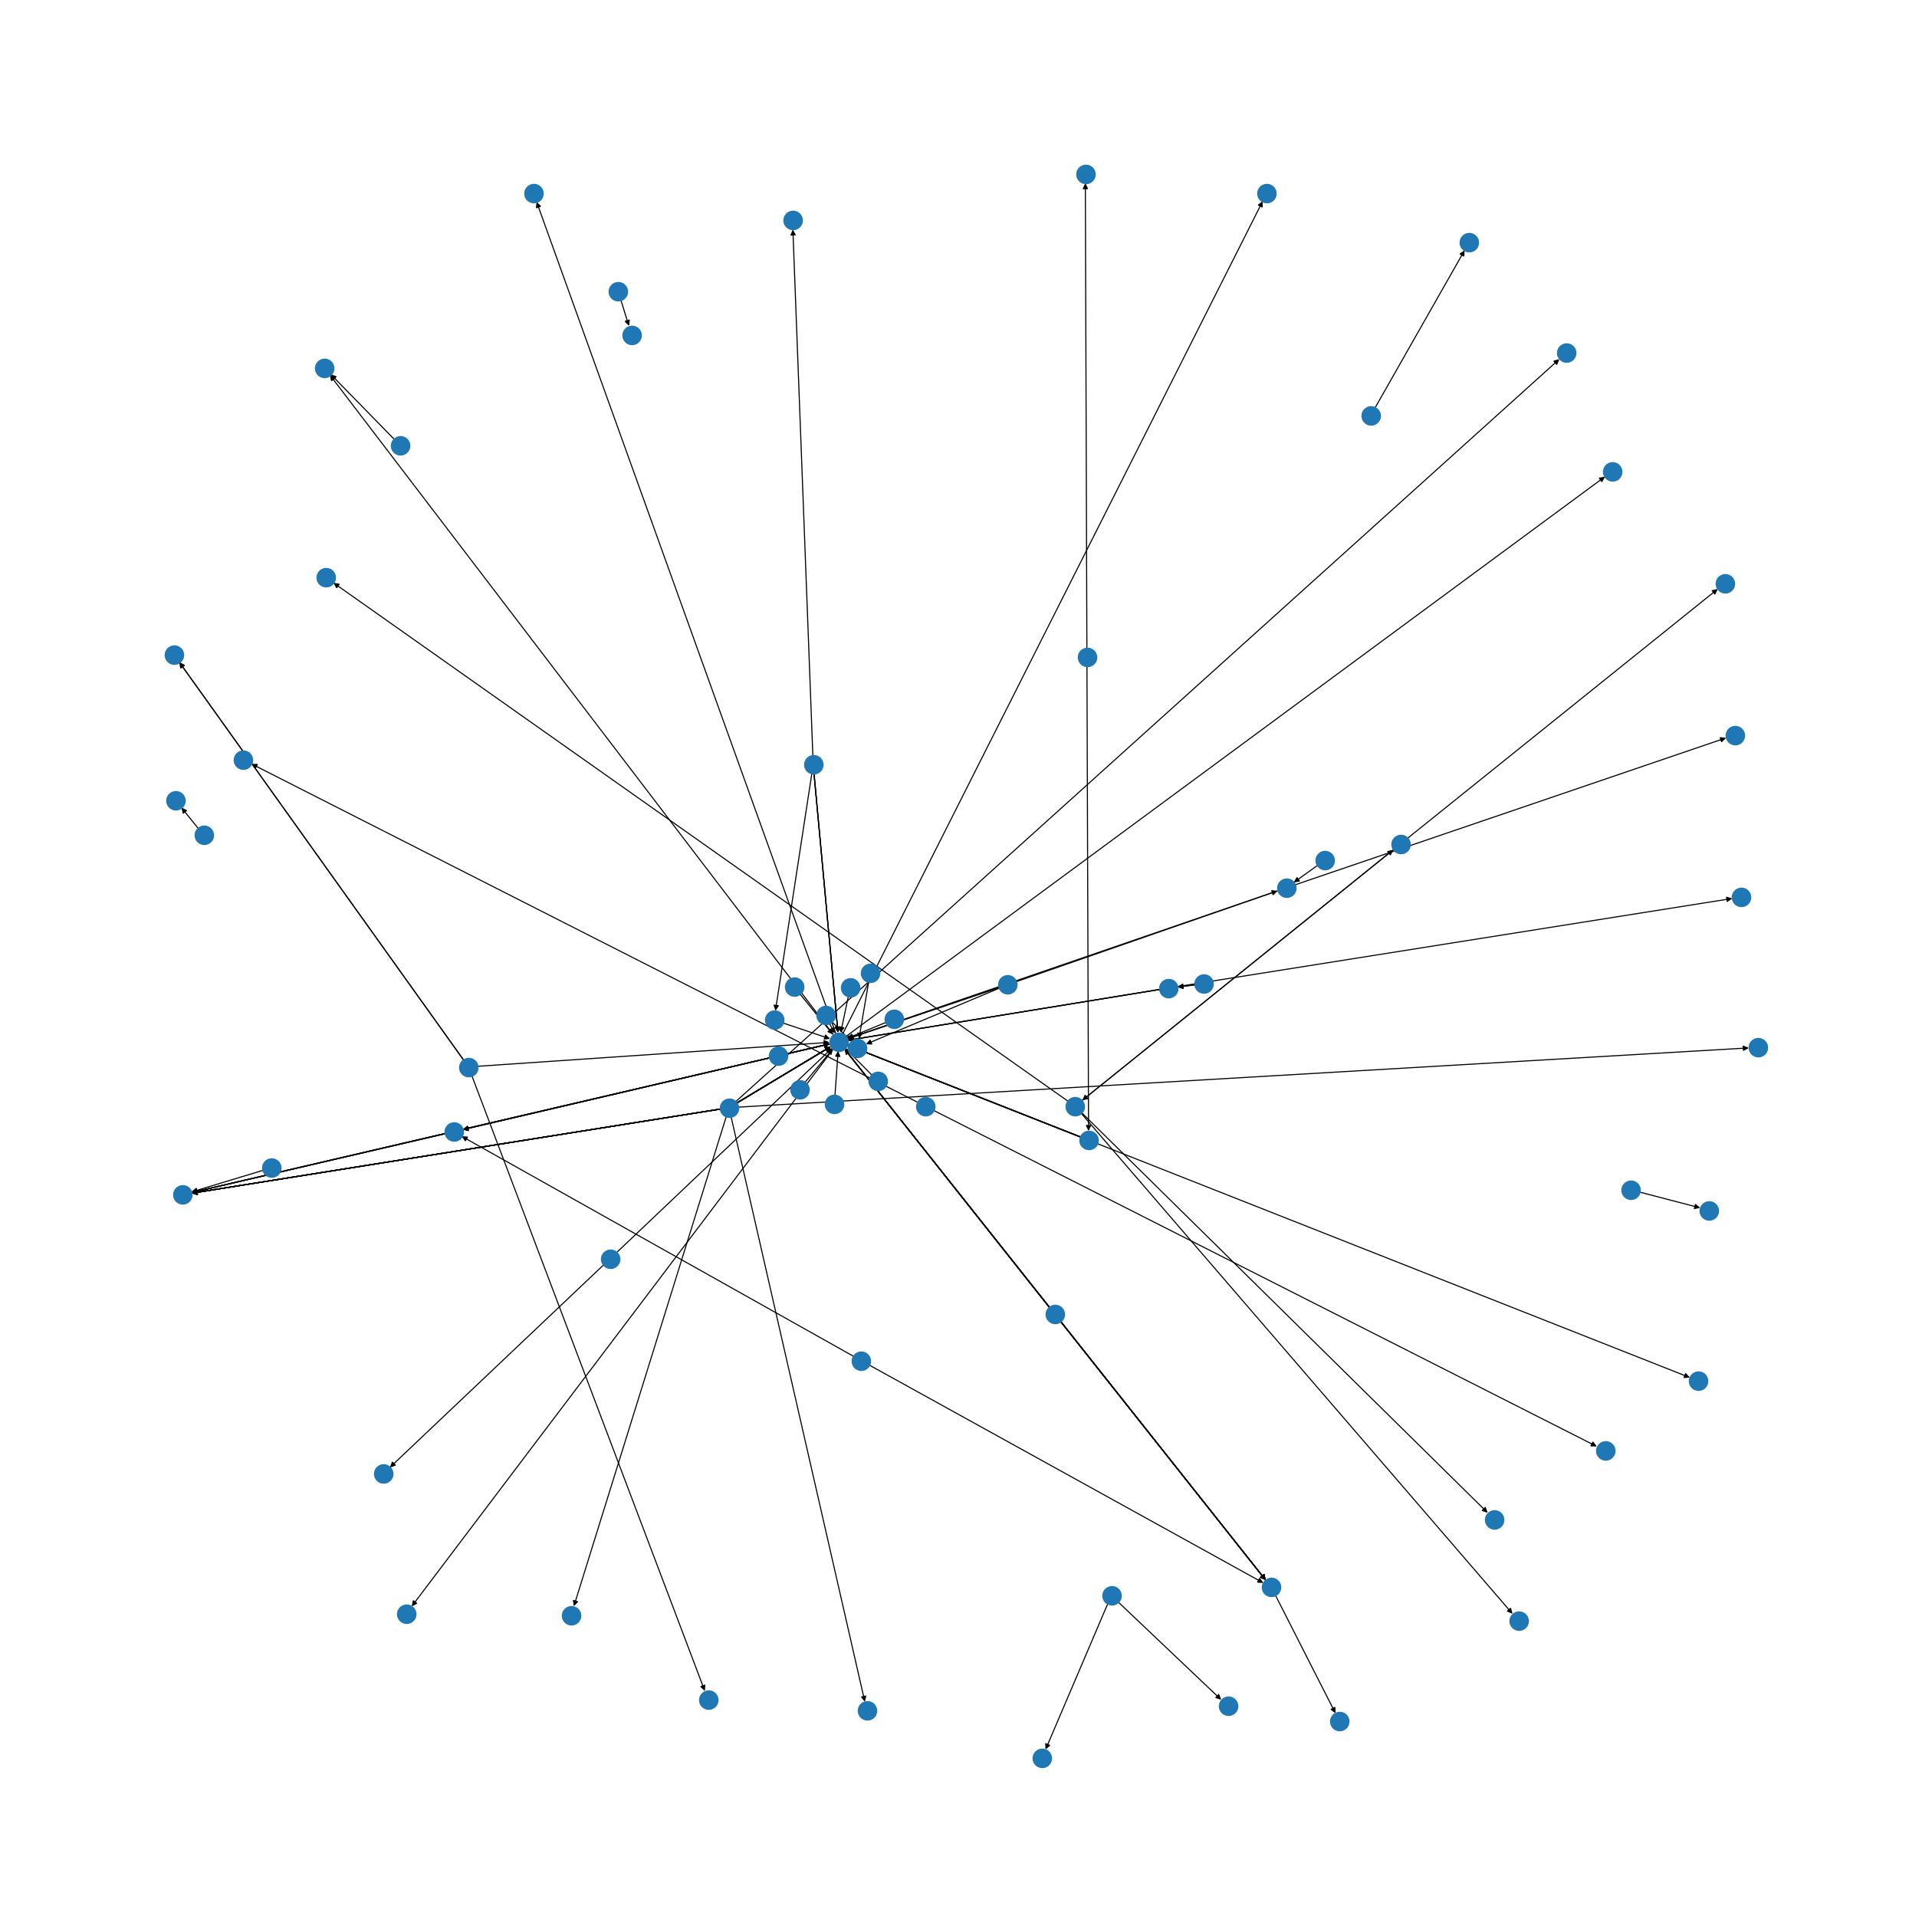

In [27]:
draw_graph(G, show_names=True, node_size=5, edge_width=1) 
plt.figure(figsize=(25,25)) 
nx.draw(G)
plt.show()

In [28]:
drop_nodes = ['New Zealand', 'Australia', 'France', 'England', 'London', 'Paris', 'Rome', 'Nile',  
              'William_', 'Treacle', 'Fender', 'Canterbury', 'Edwin', 'Mercia', 'Morcar',  
              'Northumbria', 'Stigand'] 

G.remove_nodes_from(drop_nodes) 

/var/folders/sz/3pgn8fsd6v5g9t57hwhf_3sw0000gn/T/ipykernel_5633/1993881959.py:13: DeprecationWarning: 

The scipy.sparse array containers will be used instead of matrices
in Networkx 3.0. Use `to_scipy_sparse_array` instead.
  adjacency = nx.to_scipy_sparse_matrix(G, nodelist=None, dtype=None, weight='weight', format='csr')


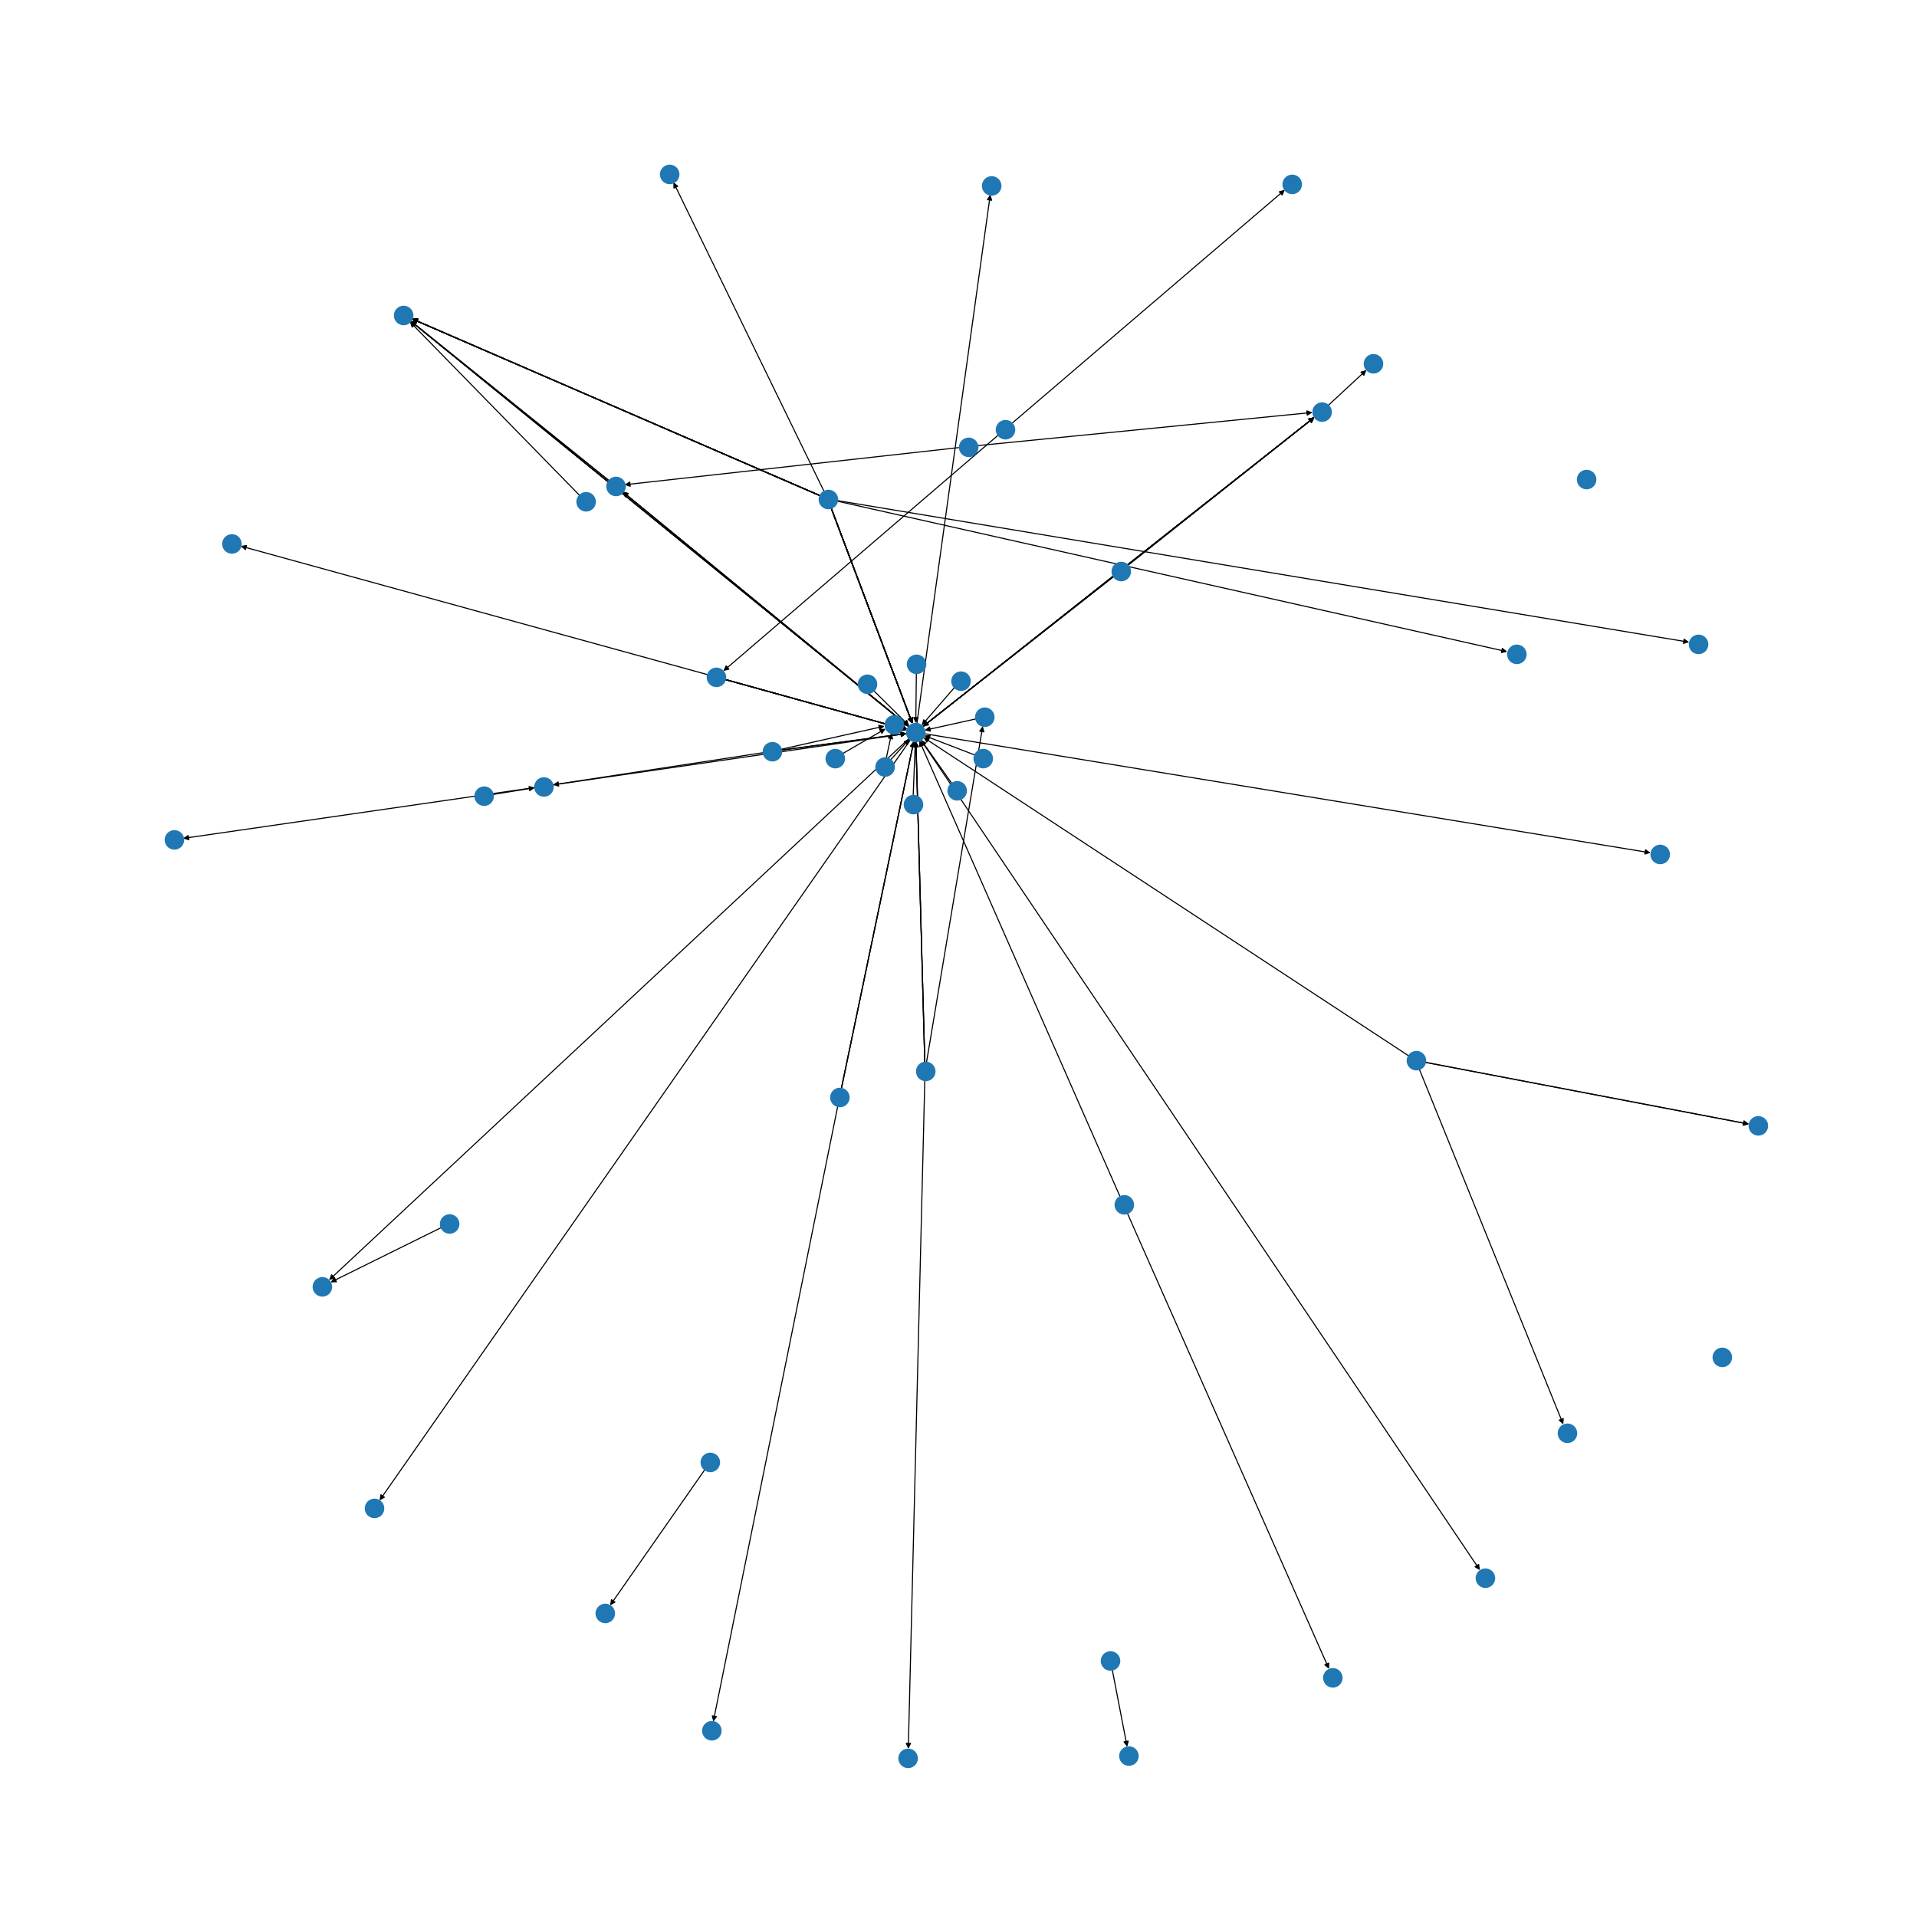

In [29]:
draw_graph(G, show_names=True, node_size=5, edge_width=1) 
plt.figure(figsize=(25,25)) 
nx.draw(G)
plt.show()

# loading data and creating networks

In [32]:
import pandas as pd

data = 'https://raw.githubusercontent.com/itsgorain/datasets/main/networks/kpop/kpop_edgelist.csv' 

df = pd.read_csv(data) 
df['source'] = df['source'].str[0:16] 
df['target'] = df['target'].str[0:16] 

df.head()

source       target
0     @kmg3445t  @code_kunst
1     @highgrnd  @code_kunst
2  @youngjay_93  @code_kunst
3   @sobeompark  @code_kunst
4  @justhiseung  @code_kunst

In [33]:
df.shape[0] 

1286

In [34]:
import networkx as nx

G = nx.from_pandas_edgelist(df) 

G.remove_edges_from(nx.selfloop_edges(G)) 

G.remove_node('@') # remove a junk node 

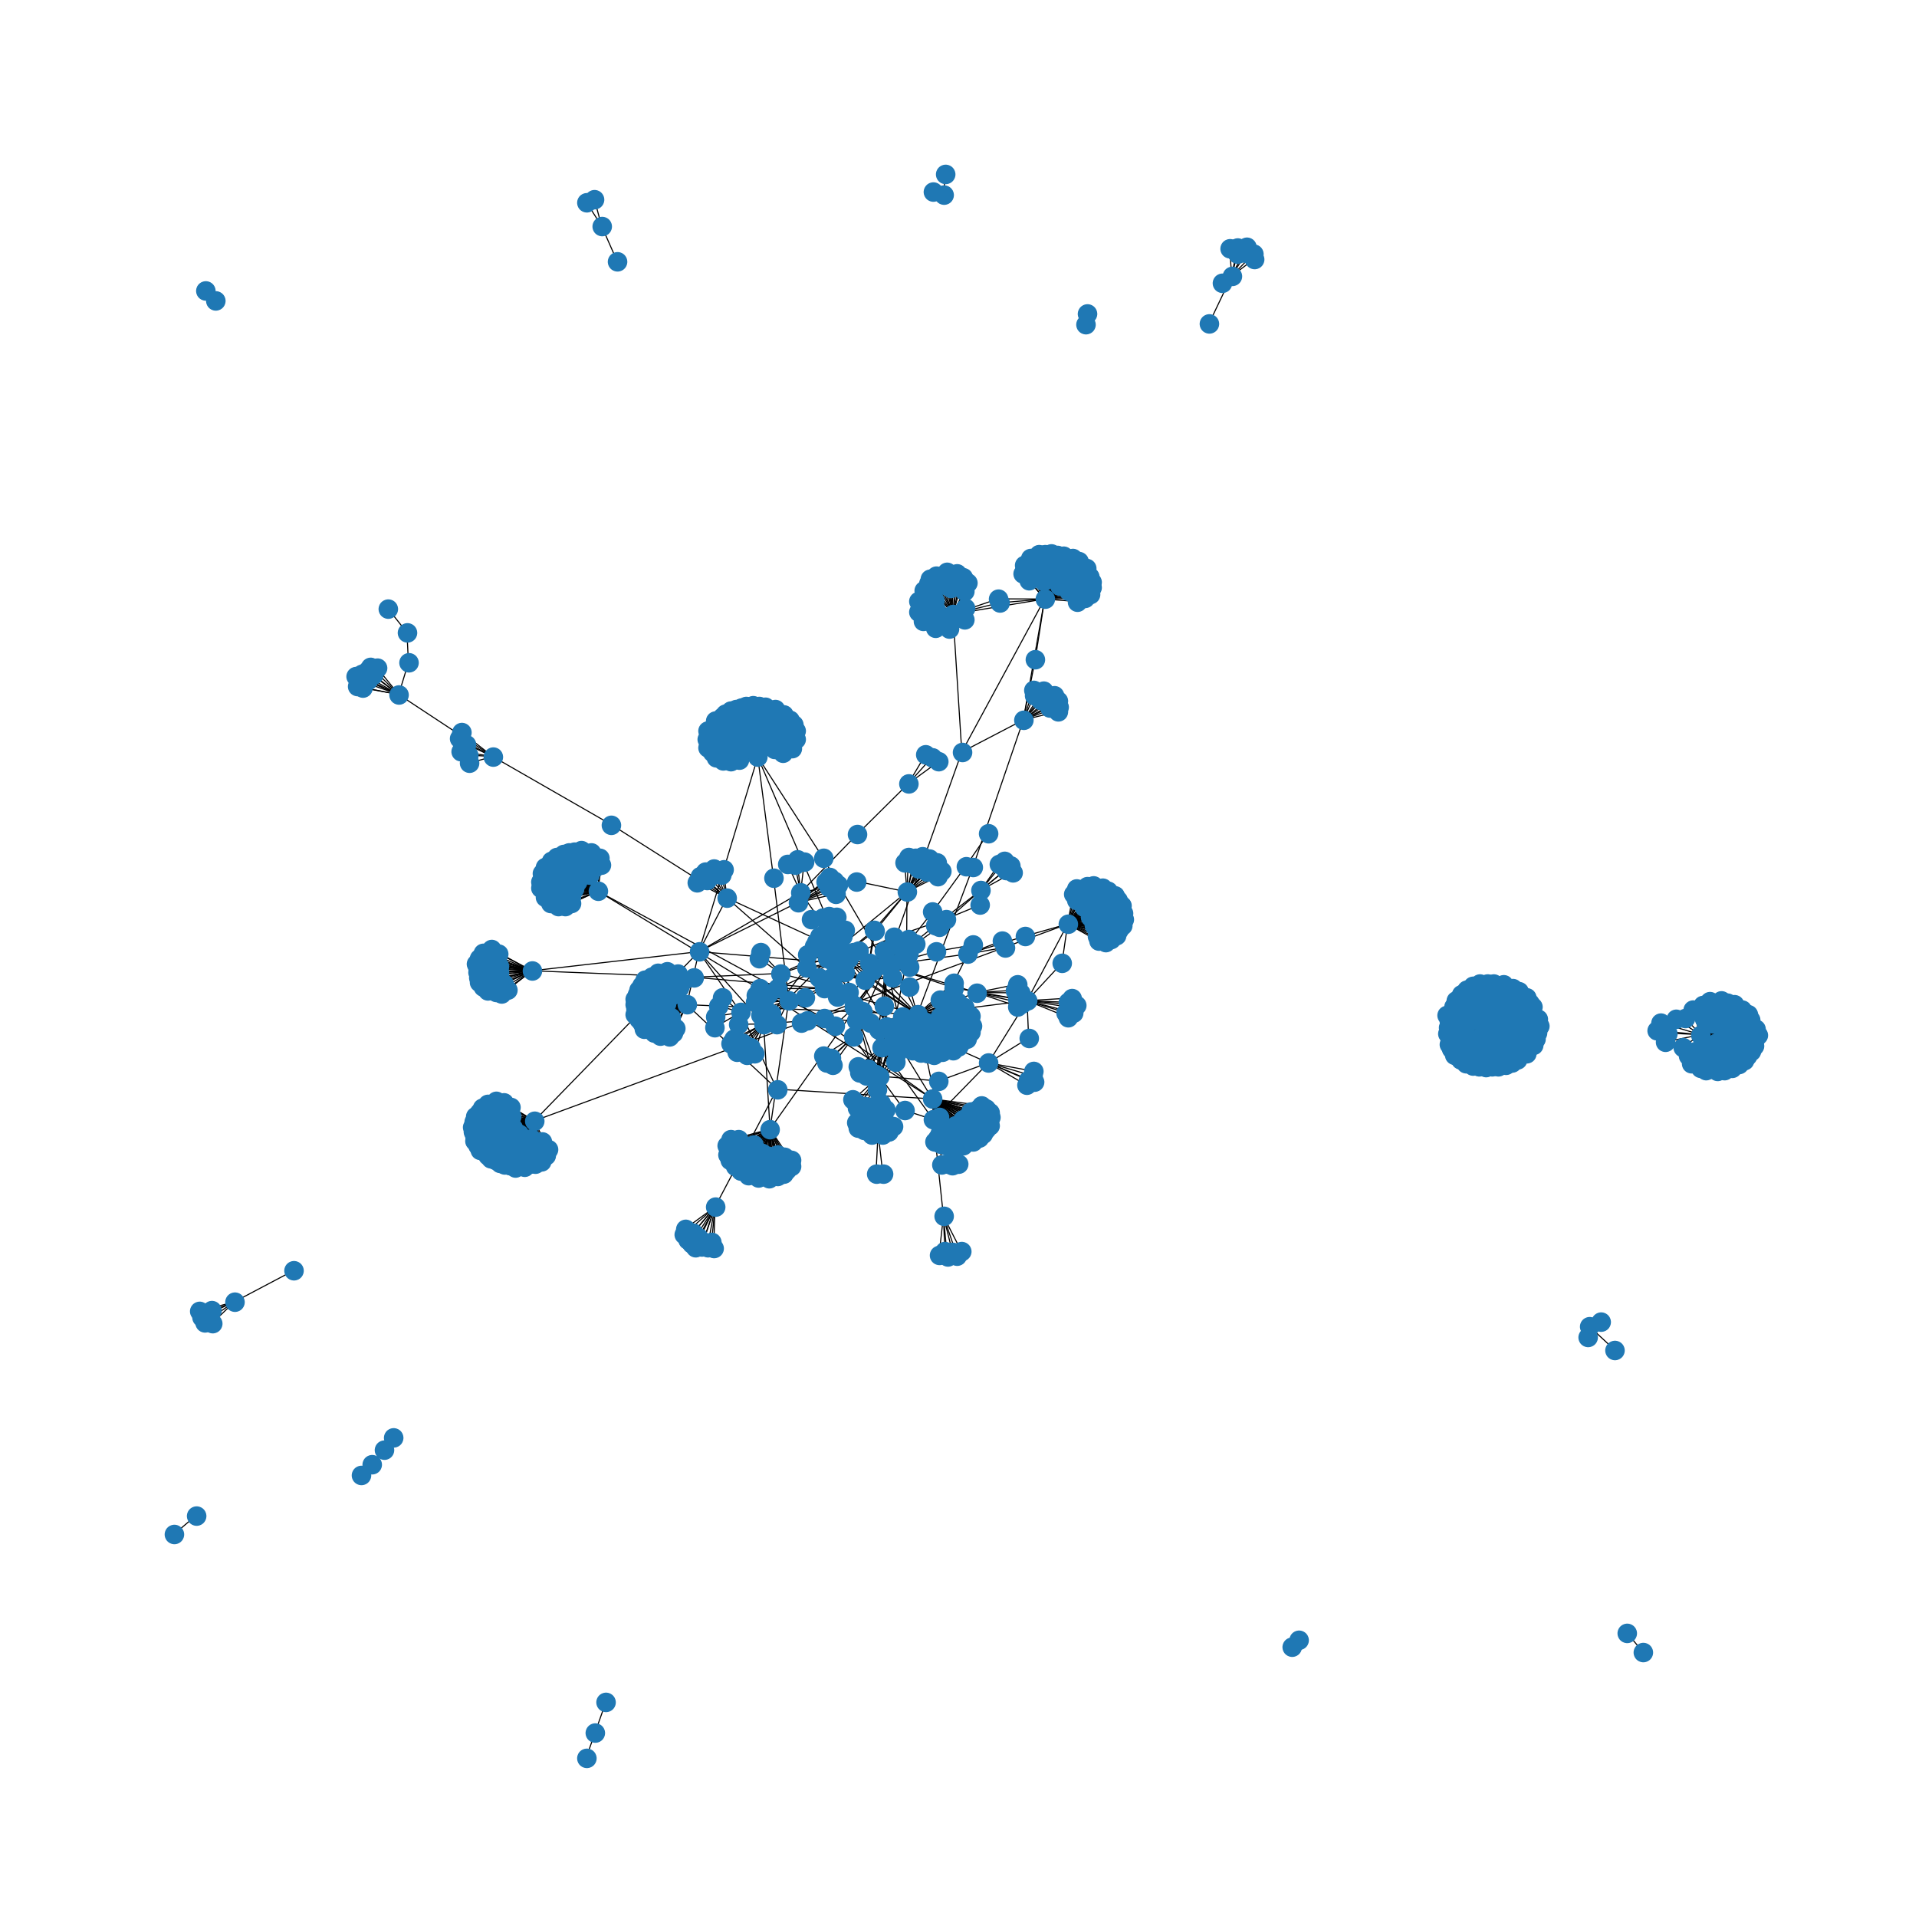

In [35]:
plt.figure(figsize=(25,25)) 
nx.draw(G)
plt.show()

# network size and complexity

In [36]:
nx.info(G) 

/var/folders/sz/3pgn8fsd6v5g9t57hwhf_3sw0000gn/T/ipykernel_5633/3105136507.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(G)


'Graph with 1163 nodes and 1237 edges'

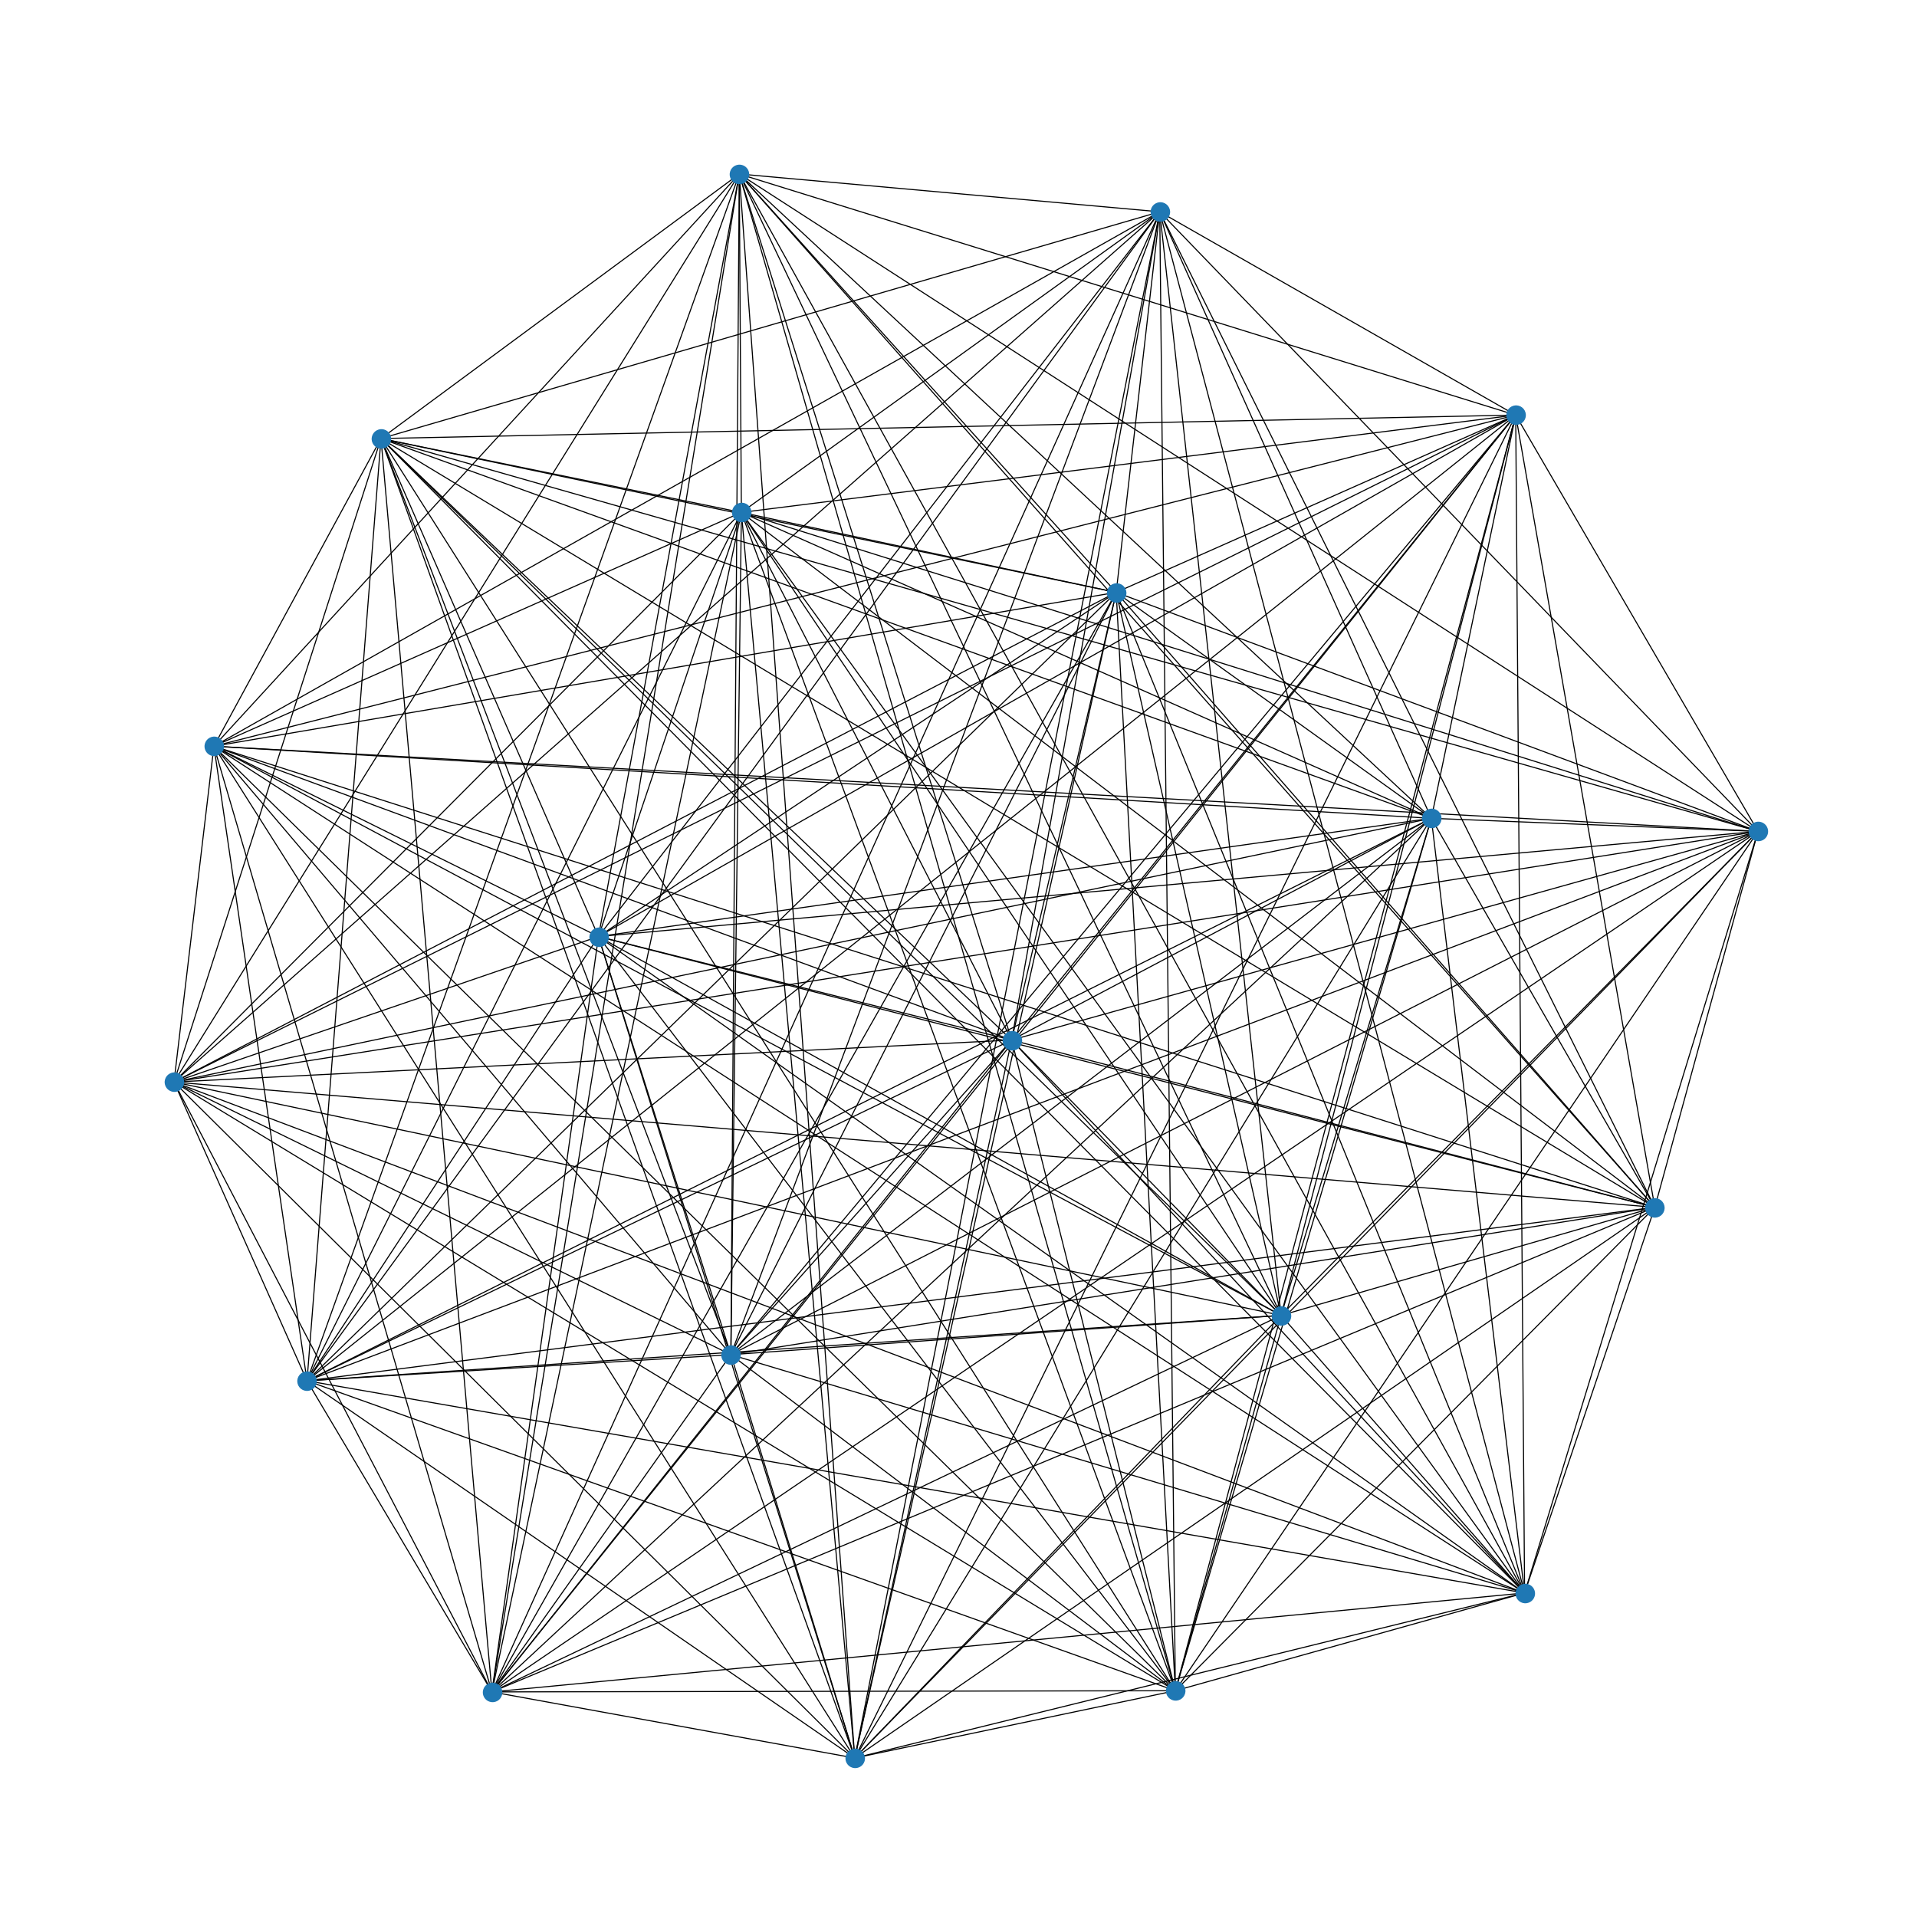

In [42]:
G_conn = nx.complete_graph(n=20) 
plt.figure(figsize=(25,25)) 
nx.draw(G_conn)
plt.show()

In [40]:
nx.info(G_conn) 

/var/folders/sz/3pgn8fsd6v5g9t57hwhf_3sw0000gn/T/ipykernel_5633/3847121871.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(G_conn)


'Graph with 20 nodes and 190 edges'

/var/folders/sz/3pgn8fsd6v5g9t57hwhf_3sw0000gn/T/ipykernel_5633/1993881959.py:13: DeprecationWarning: 

The scipy.sparse array containers will be used instead of matrices
in Networkx 3.0. Use `to_scipy_sparse_array` instead.
  adjacency = nx.to_scipy_sparse_matrix(G, nodelist=None, dtype=None, weight='weight', format='csr')


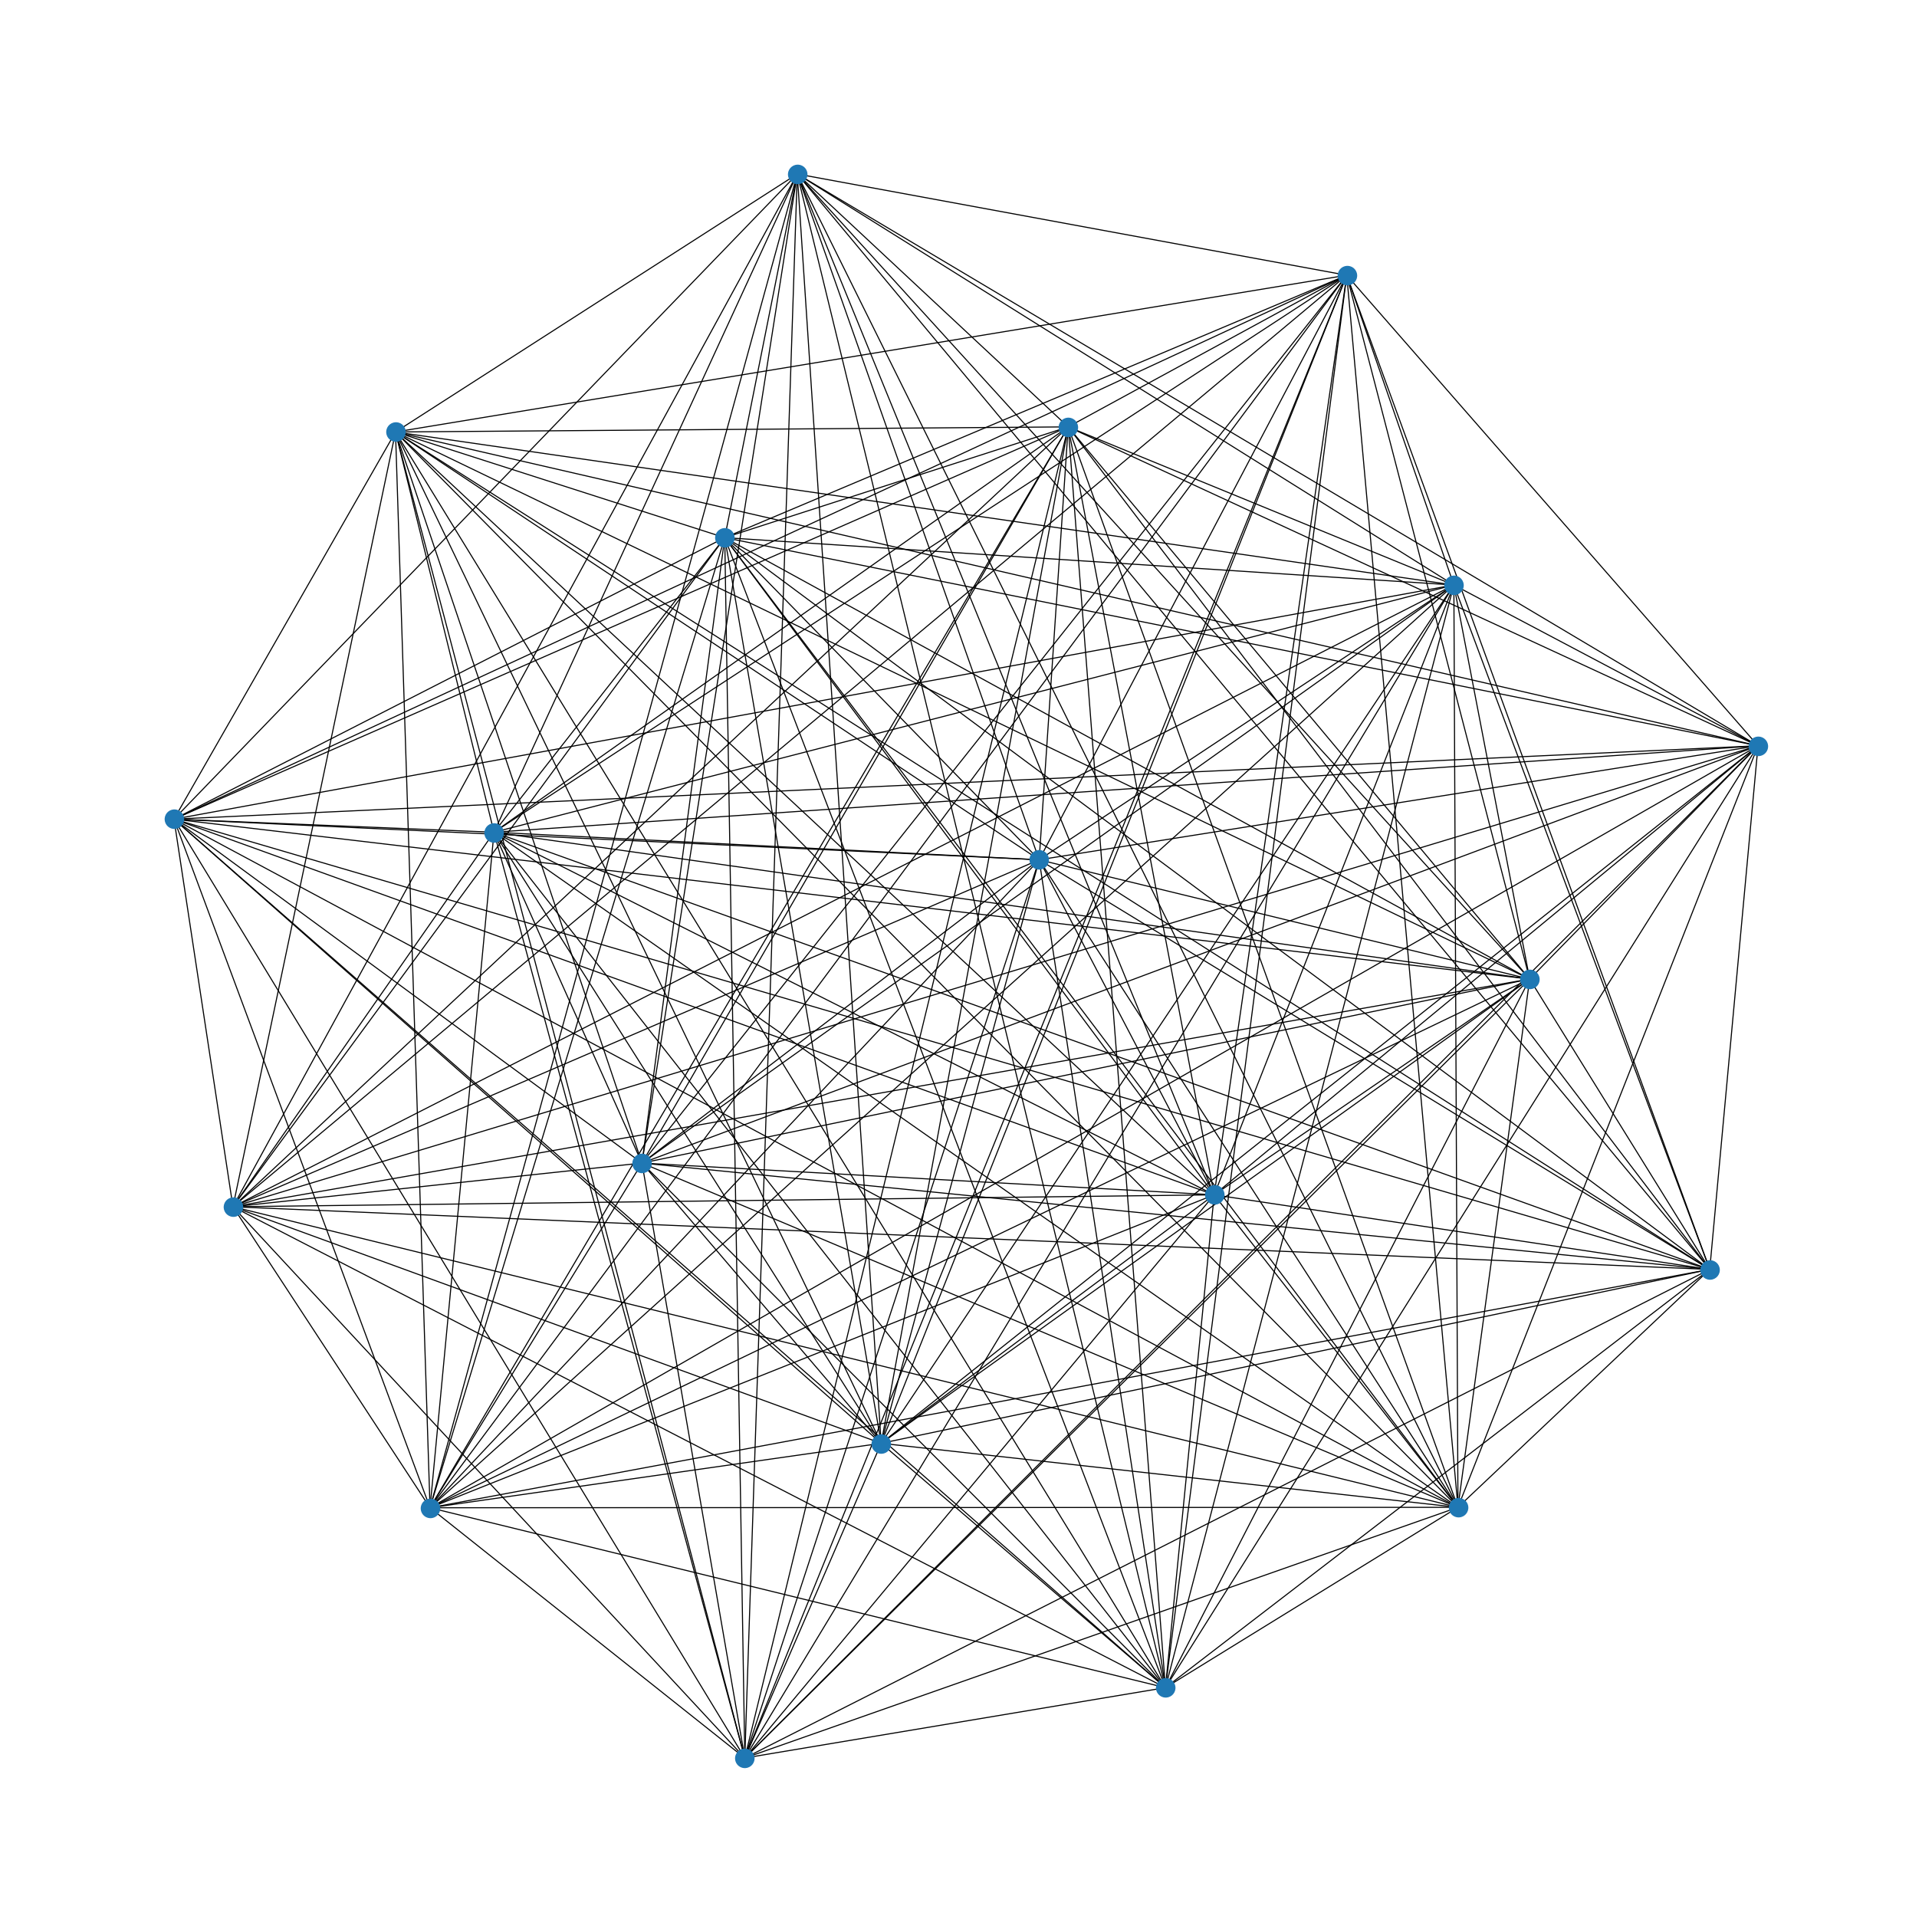

In [44]:
draw_graph(G_conn, edge_width=0.3) 
plt.figure(figsize=(25,25)) 
nx.draw(G_conn)
plt.show()

/var/folders/sz/3pgn8fsd6v5g9t57hwhf_3sw0000gn/T/ipykernel_5633/1993881959.py:13: DeprecationWarning: 

The scipy.sparse array containers will be used instead of matrices
in Networkx 3.0. Use `to_scipy_sparse_array` instead.
  adjacency = nx.to_scipy_sparse_matrix(G, nodelist=None, dtype=None, weight='weight', format='csr')


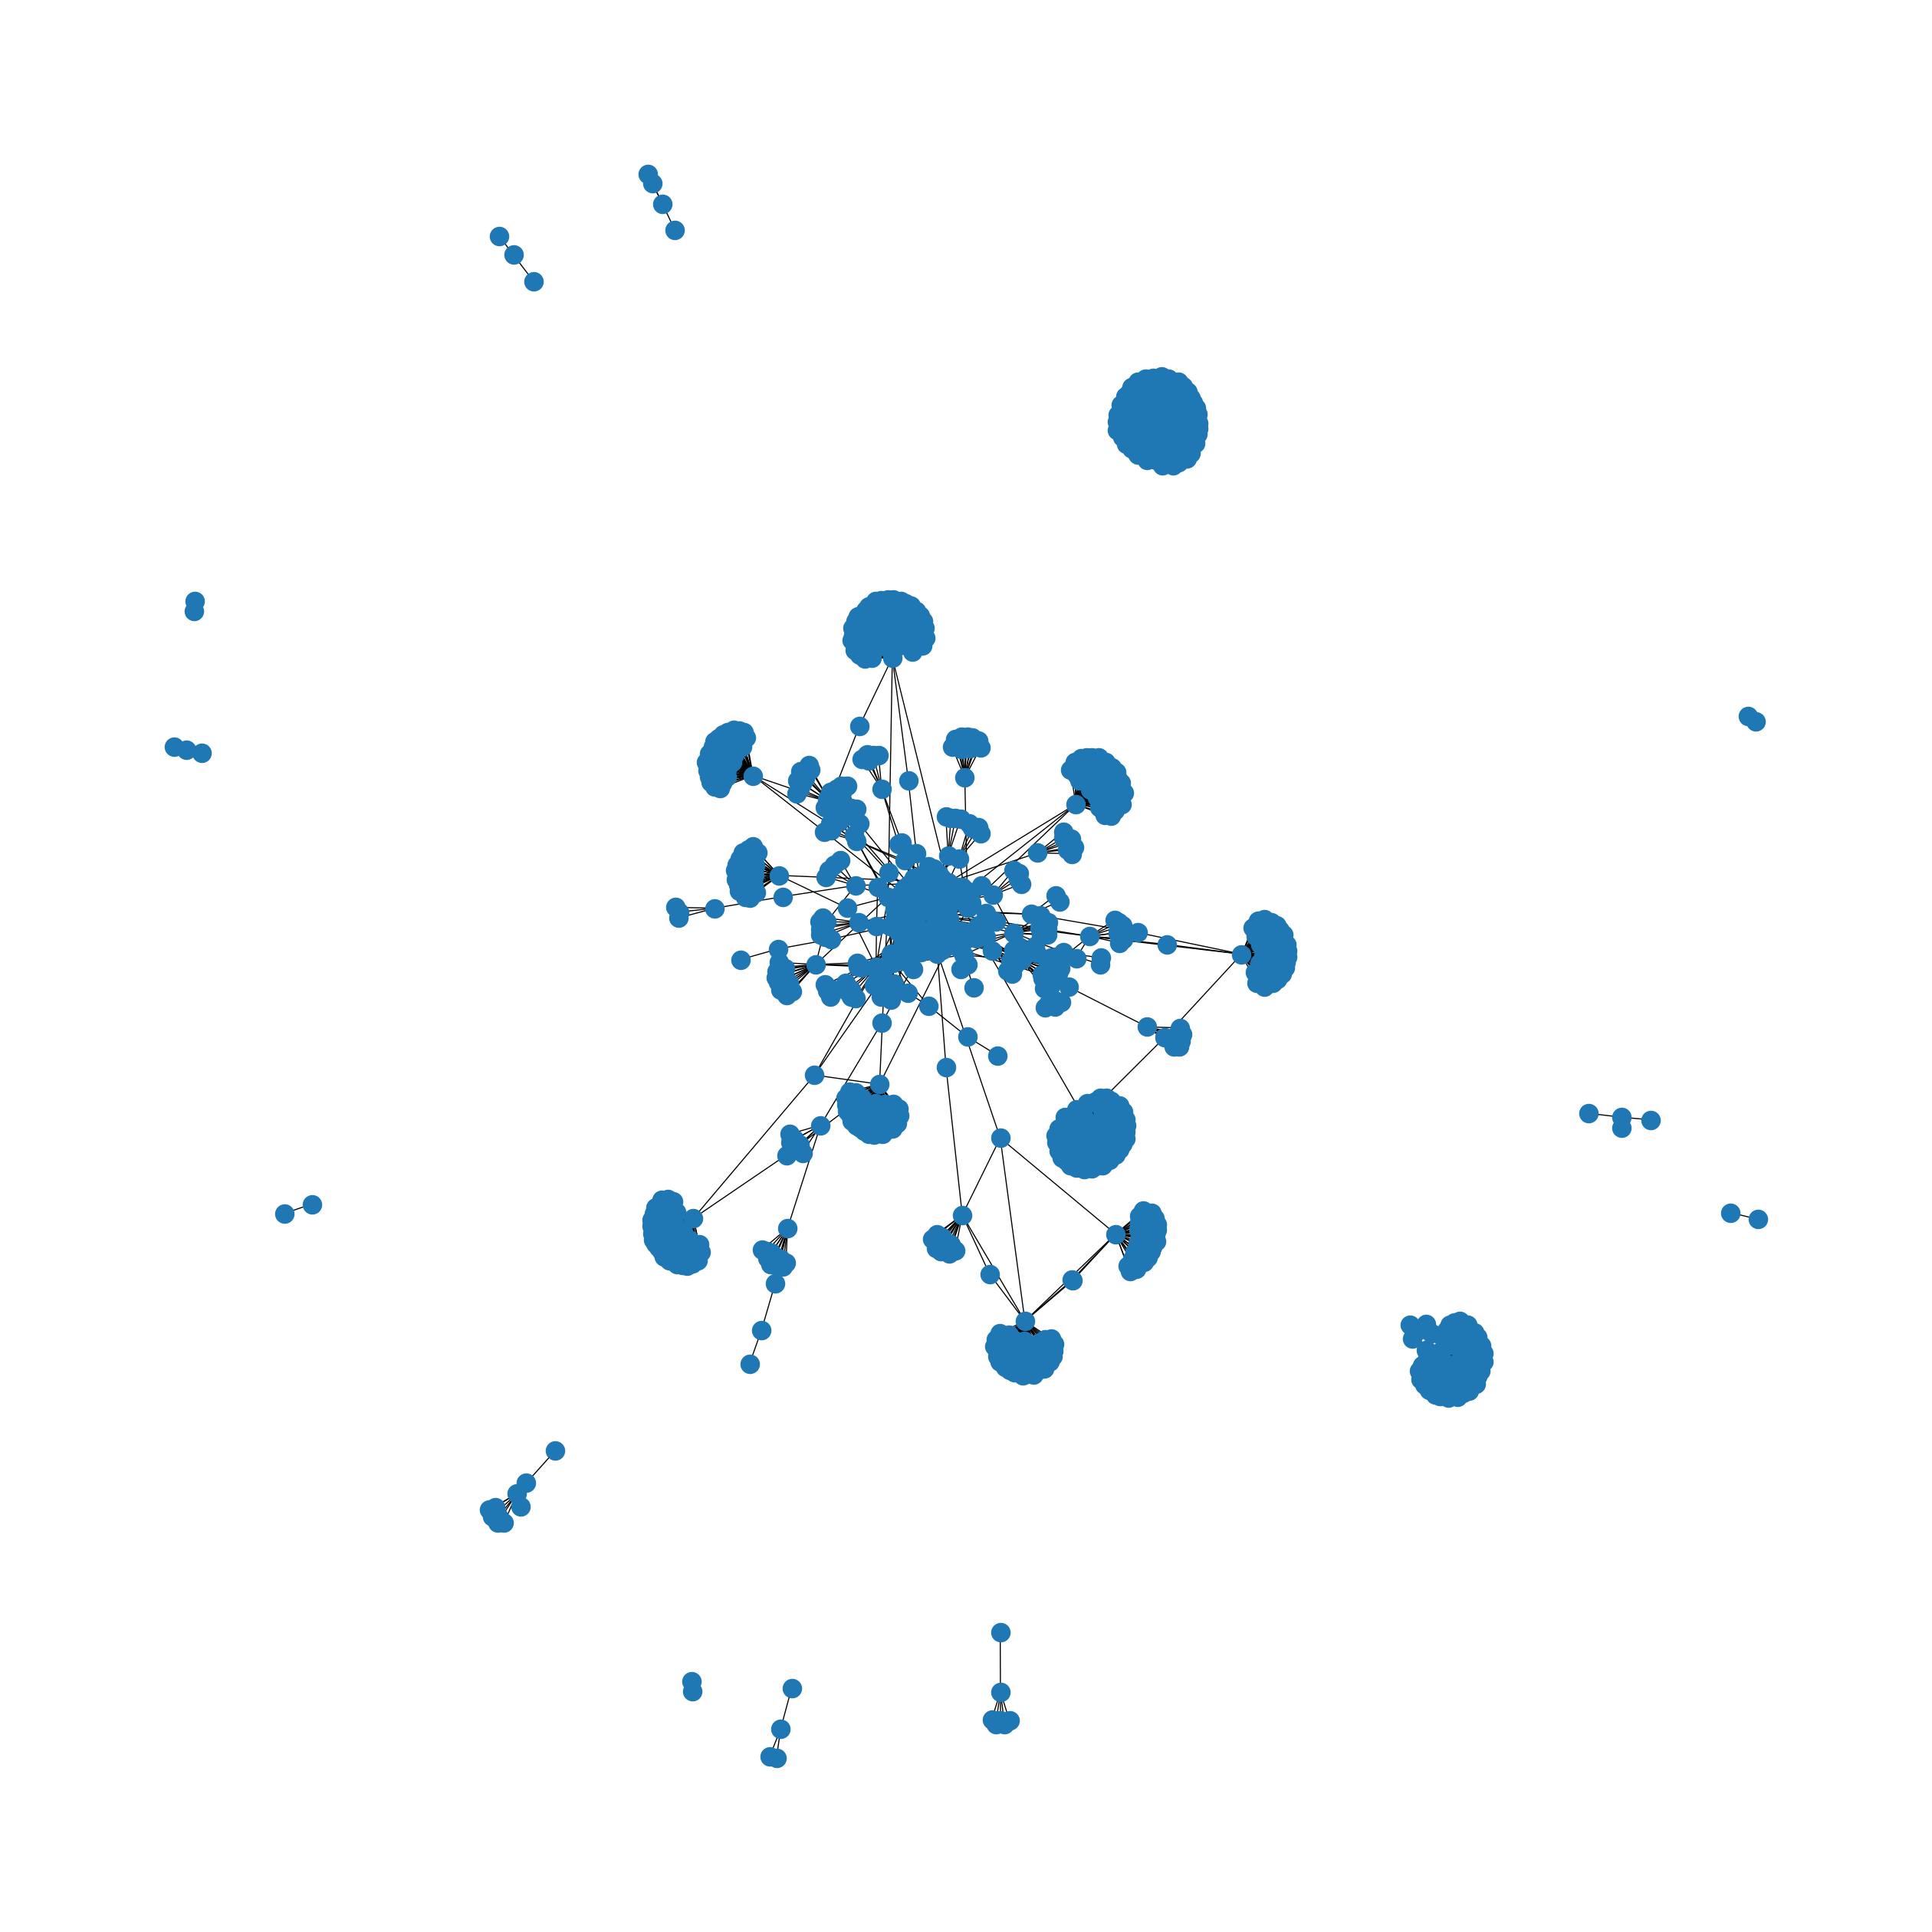

In [45]:
draw_graph(G, node_size=1, show_names=False) 
plt.figure(figsize=(25,25)) 
nx.draw(G)
plt.show()

/var/folders/sz/3pgn8fsd6v5g9t57hwhf_3sw0000gn/T/ipykernel_5633/1993881959.py:13: DeprecationWarning: 

The scipy.sparse array containers will be used instead of matrices
in Networkx 3.0. Use `to_scipy_sparse_array` instead.
  adjacency = nx.to_scipy_sparse_matrix(G, nodelist=None, dtype=None, weight='weight', format='csr')


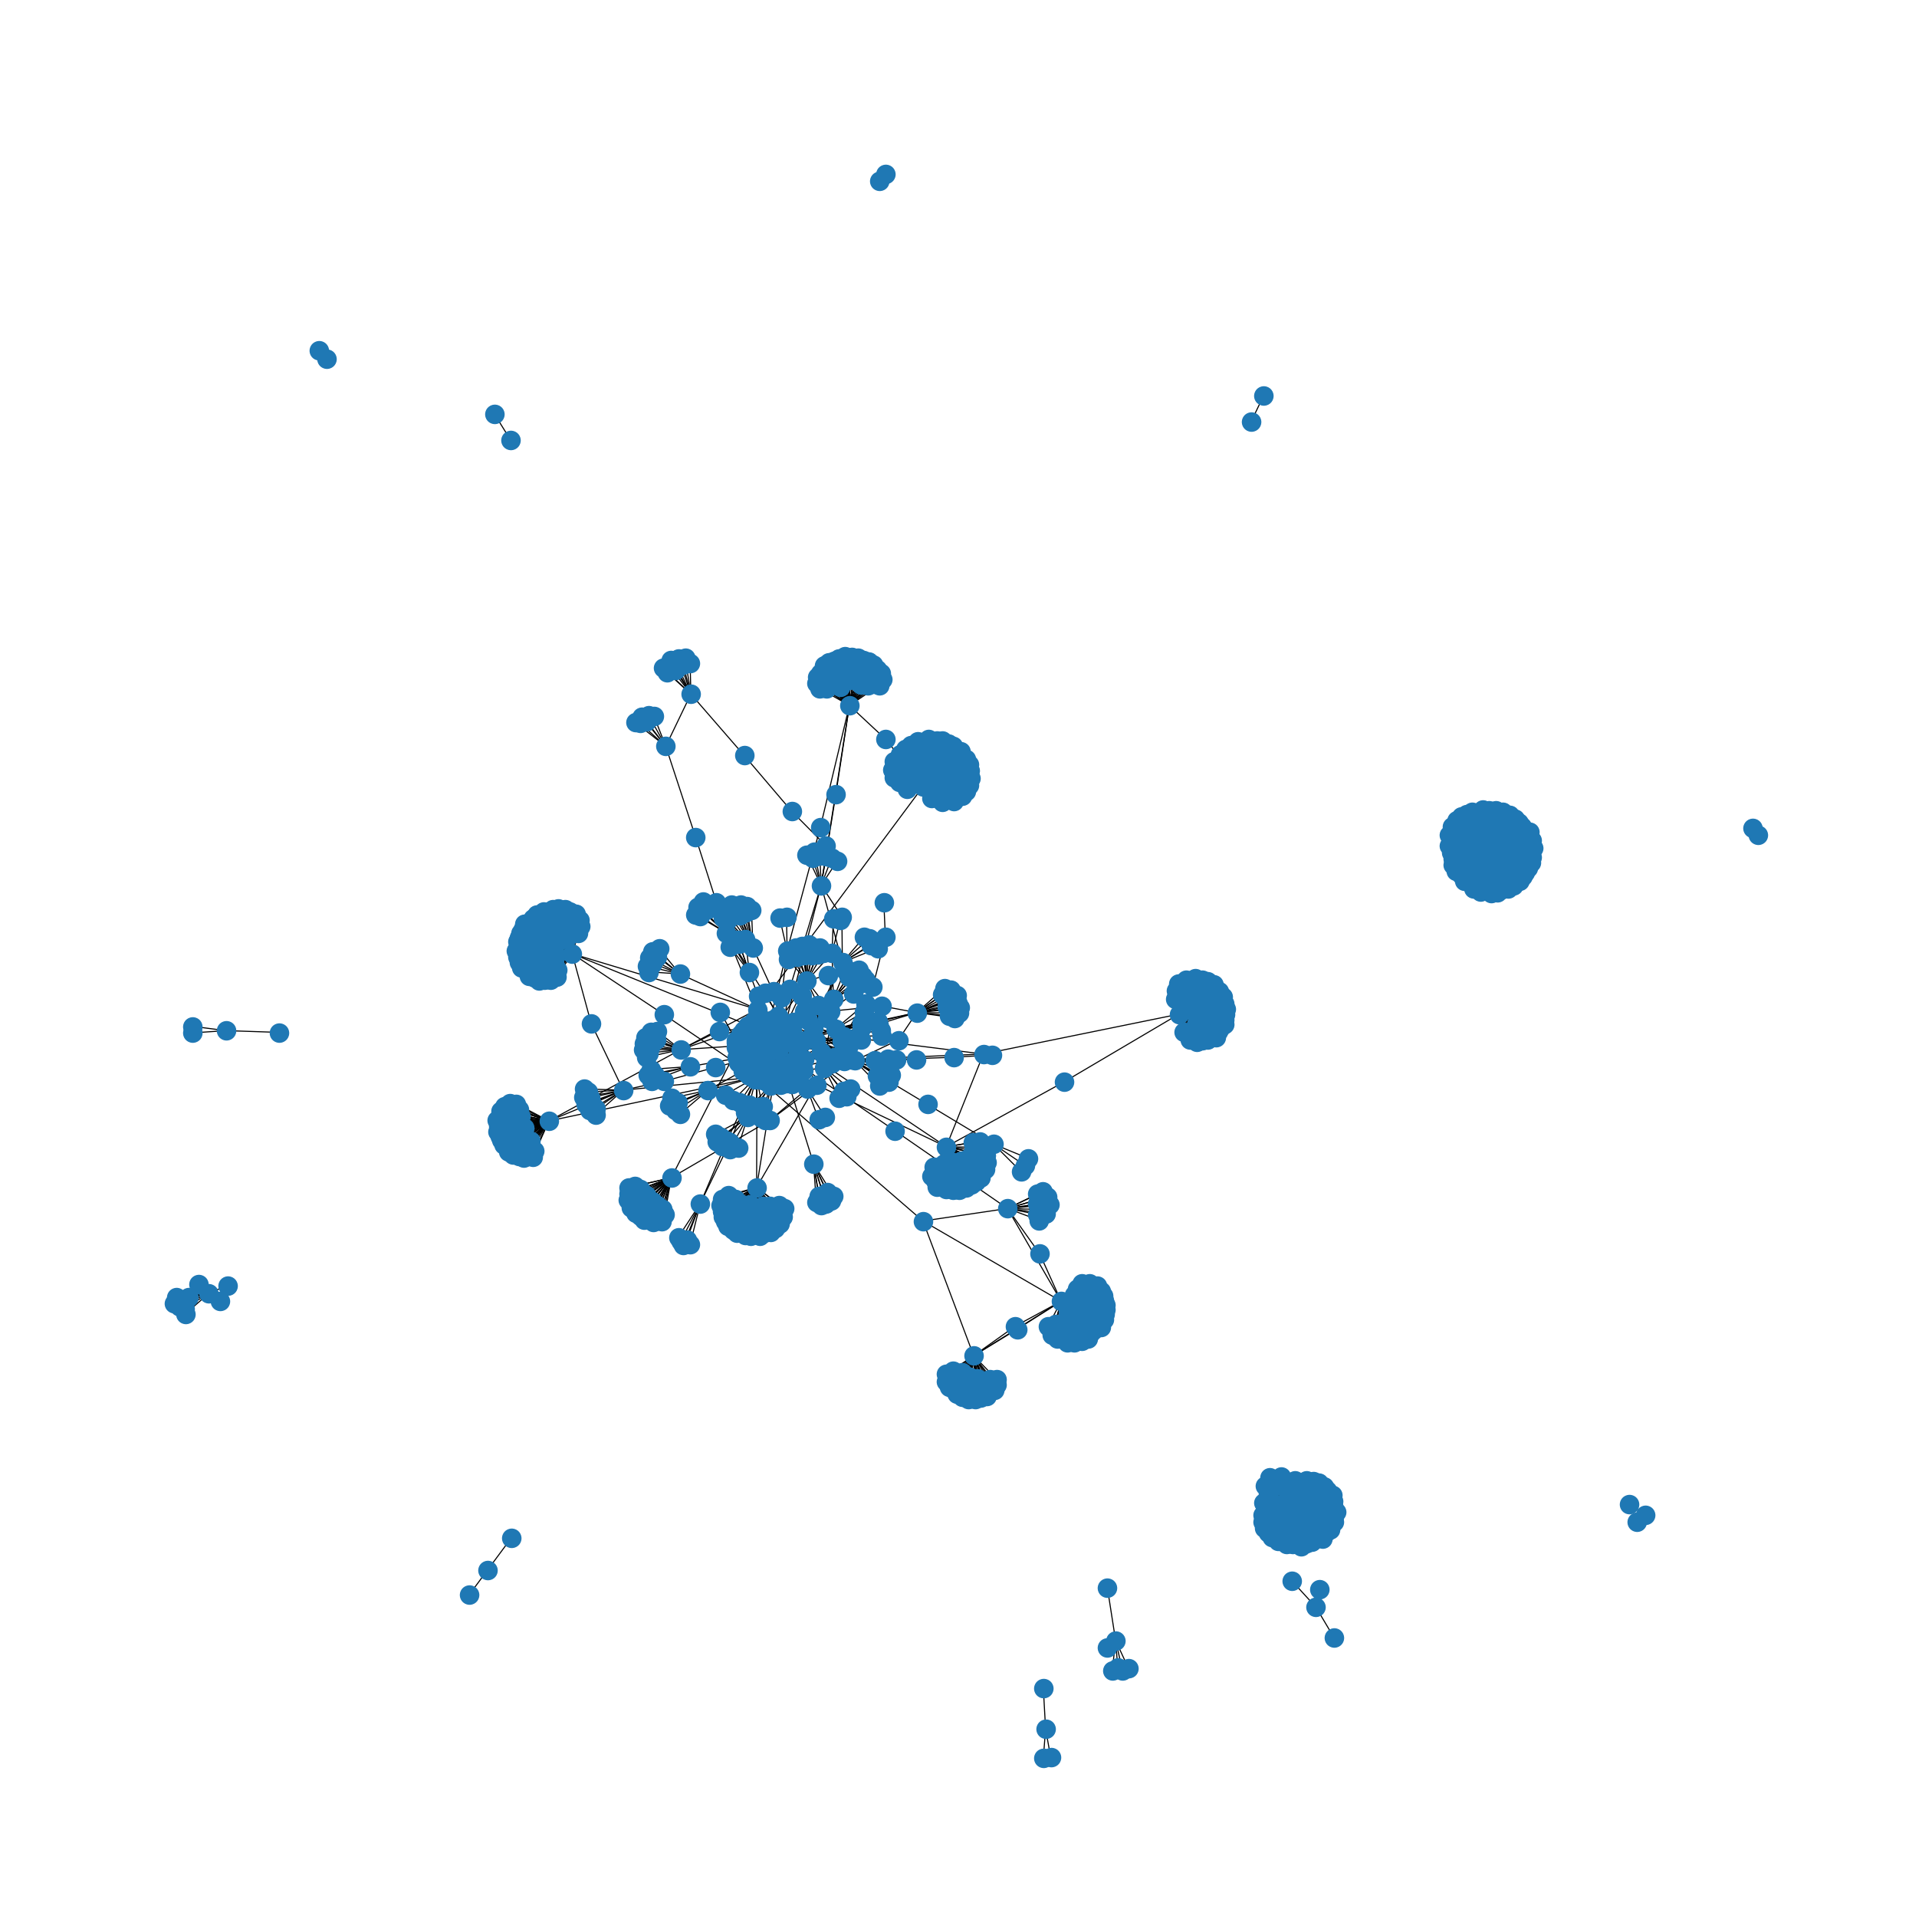

In [46]:
draw_graph(nx.k_core(G, 2), node_size=1, show_names=False) 
plt.figure(figsize=(25,25)) 
nx.draw(G)
plt.show()

# important nodes

In [47]:
degrees = dict(nx.degree(G)) 
degrees

{'@kmg3445t': 1,
 '@code_kunst': 13,
 '@highgrnd': 1,
 '@youngjay_93': 1,
 '@sobeompark': 1,
 '@justhiseung': 1,
 '@hwajilla': 1,
 '@blobyblo': 4,
 '@minddonyy': 1,
 '@iuiive': 1,
 '@wgyenny': 1,
 '@wondergirls': 2,
 '@wg_lim': 2,
 '@eugenius887': 1,
 '@tukutz81': 1,
 '@krungy21': 2,
 '@haroobomkum': 86,
 '@ericjracy': 1,
 '@nolza_xxi': 1,
 '@ryubae21': 1,
 '@rebellebomzi': 1,
 '@gyulokpocjinhwa': 1,
 '@seungrisoio': 1,
 '@made_for_tttops': 1,
 '@clprv': 1,
 '@twinkle_tisa': 1,
 '@haroodidi': 1,
 '@jjy82_stop': 1,
 '@nokiov': 1,
 '@kristinekwaknok': 1,
 '@mm_3058': 1,
 '@2ne1_chisanokio': 1,
 '@izumingkki21': 1,
 '@moongyuri': 1,
 '@dyana_norazam': 1,
 '@maaa21too': 1,
 '@wereuniq': 1,
 '@bb21konnerakhi': 1,
 '@dindaacchan': 1,
 '@bomswife': 1,
 '@bomshiatus': 1,
 '@ftsuhyunouijakn': 1,
 '@harooharoobomou': 1,
 '@ddragon2ne1ouij': 1,
 '@arab_bombshells': 1,
 '@boming_21': 1,
 '@dc2ne1': 1,
 '@nicklim678': 1,
 '@2ne1kh': 1,
 '@jykim2505': 1,
 '@taempress': 1,
 '@oneofkindxi': 1,
 '@onei

In [48]:
degree_df = pd.DataFrame(degrees, index=[0]).T 
degree_df.columns = ['degrees'] 
degree_df.sort_values('degrees', inplace=True, ascending=False) 
degree_df.head() 

degrees
@b_hundred_hyun      128
@zanelowe             94
@haroobomkum          86
@spotifykr            80
@itzailee             79

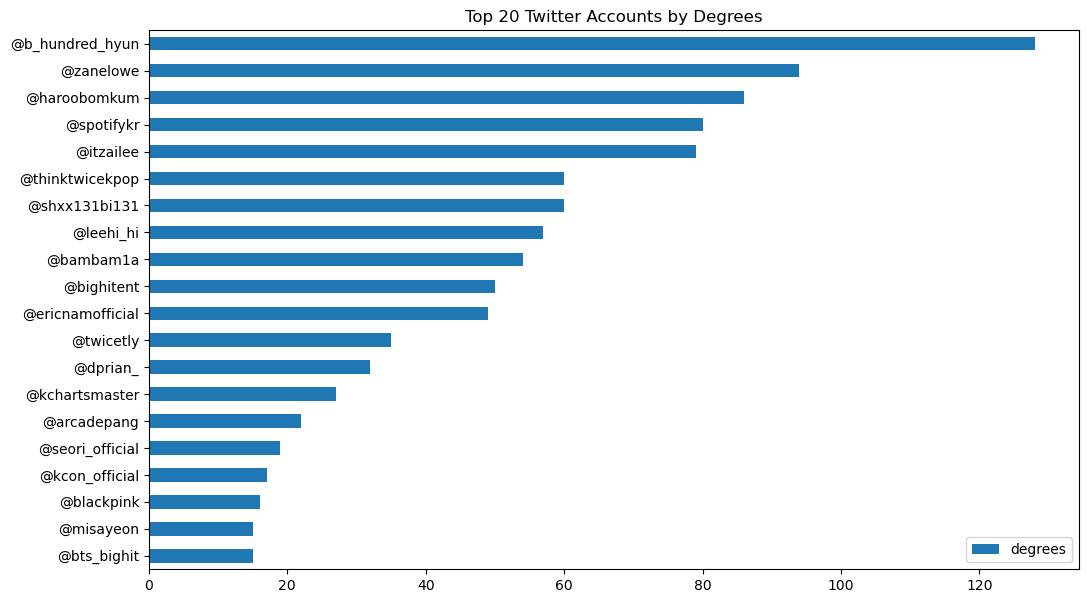

In [50]:
import matplotlib.pyplot as plt 
title = 'Top 20 Twitter Accounts by Degrees' 
_= degree_df[0:20].plot.barh(title=title, figsize=(12,7)) 
plt.gca().invert_yaxis() 

In [51]:
degcent = nx.degree_centrality(G) 
degcent 

{'@kmg3445t': 0.0008605851979345956,
 '@code_kunst': 0.011187607573149742,
 '@highgrnd': 0.0008605851979345956,
 '@youngjay_93': 0.0008605851979345956,
 '@sobeompark': 0.0008605851979345956,
 '@justhiseung': 0.0008605851979345956,
 '@hwajilla': 0.0008605851979345956,
 '@blobyblo': 0.0034423407917383822,
 '@minddonyy': 0.0008605851979345956,
 '@iuiive': 0.0008605851979345956,
 '@wgyenny': 0.0008605851979345956,
 '@wondergirls': 0.0017211703958691911,
 '@wg_lim': 0.0017211703958691911,
 '@eugenius887': 0.0008605851979345956,
 '@tukutz81': 0.0008605851979345956,
 '@krungy21': 0.0017211703958691911,
 '@haroobomkum': 0.07401032702237521,
 '@ericjracy': 0.0008605851979345956,
 '@nolza_xxi': 0.0008605851979345956,
 '@ryubae21': 0.0008605851979345956,
 '@rebellebomzi': 0.0008605851979345956,
 '@gyulokpocjinhwa': 0.0008605851979345956,
 '@seungrisoio': 0.0008605851979345956,
 '@made_for_tttops': 0.0008605851979345956,
 '@clprv': 0.0008605851979345956,
 '@twinkle_tisa': 0.0008605851979345956,
 '

In [52]:
degcent_df = pd.DataFrame(degcent, index=[0]).T 
degcent_df.columns = ['degree_centrality'] 
degcent_df.sort_values('degree_centrality', inplace=True, ascending=False) 
degcent_df.head() 

degree_centrality
@b_hundred_hyun           0.110155
@zanelowe                 0.080895
@haroobomkum              0.074010
@spotifykr                0.068847
@itzailee                 0.067986

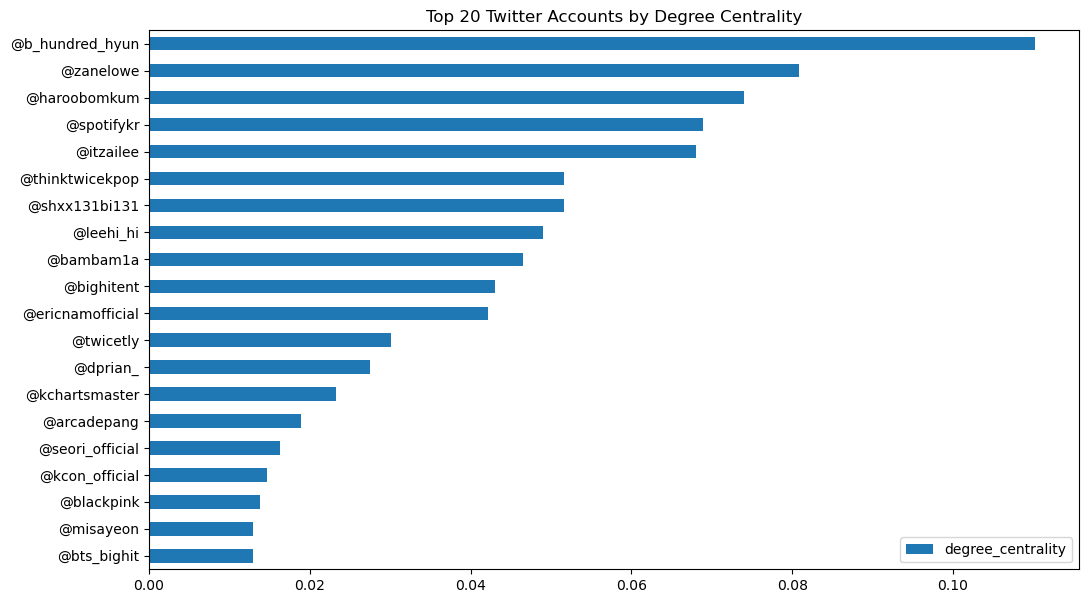

In [53]:
title = 'Top 20 Twitter Accounts by Degree Centrality' 
_= degcent_df[0:20].plot.barh(title=title, figsize=(12,7)) 
plt.gca().invert_yaxis() 

In [54]:
betwcent = nx.betweenness_centrality(G) 
betwcent 

{'@kmg3445t': 0.0,
 '@code_kunst': 0.016037572215773392,
 '@highgrnd': 0.0,
 '@youngjay_93': 0.0,
 '@sobeompark': 0.0,
 '@justhiseung': 0.0,
 '@hwajilla': 0.0,
 '@blobyblo': 0.02836579219003866,
 '@minddonyy': 0.0,
 '@iuiive': 0.0,
 '@wgyenny': 0.0,
 '@wondergirls': 0.0013446180439736057,
 '@wg_lim': 0.0026862711087984274,
 '@eugenius887': 0.0,
 '@tukutz81': 0.0,
 '@krungy21': 0.022526397845298824,
 '@haroobomkum': 0.12178879004965242,
 '@ericjracy': 0.0,
 '@nolza_xxi': 0.0,
 '@ryubae21': 0.0,
 '@rebellebomzi': 0.0,
 '@gyulokpocjinhwa': 0.0,
 '@seungrisoio': 0.0,
 '@made_for_tttops': 0.0,
 '@clprv': 0.0,
 '@twinkle_tisa': 0.0,
 '@haroodidi': 0.0,
 '@jjy82_stop': 0.0,
 '@nokiov': 0.0,
 '@kristinekwaknok': 0.0,
 '@mm_3058': 0.0,
 '@2ne1_chisanokio': 0.0,
 '@izumingkki21': 0.0,
 '@moongyuri': 0.0,
 '@dyana_norazam': 0.0,
 '@maaa21too': 0.0,
 '@wereuniq': 0.0,
 '@bb21konnerakhi': 0.0,
 '@dindaacchan': 0.0,
 '@bomswife': 0.0,
 '@bomshiatus': 0.0,
 '@ftsuhyunouijakn': 0.0,
 '@harooharoobomou

In [55]:
betwcent_df = pd.DataFrame(betwcent, index=[0]).T 
betwcent_df.columns = ['betweenness_centrality'] 
betwcent_df.sort_values('betweenness_centrality', inplace=True, ascending=False) 
betwcent_df.head() 

betweenness_centrality
@youtube                      0.193090
@spotifykr                    0.175619
@kchartsmaster                0.167481
@blackpink                    0.125805
@haroobomkum                  0.121789

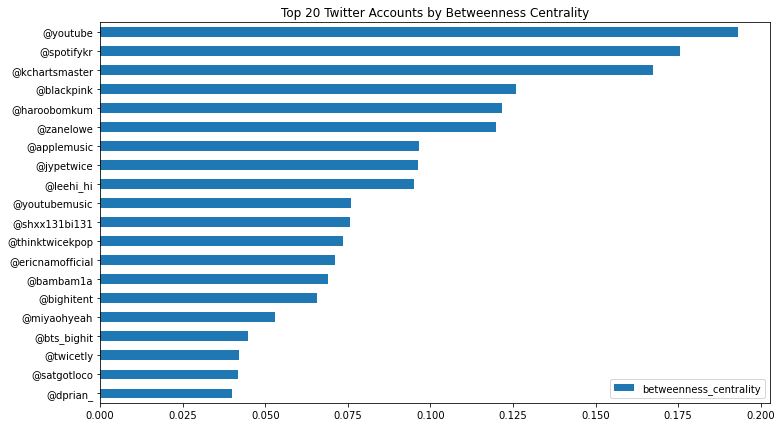

In [24]:
title = 'Top 20 Twitter Accounts by Betweenness Centrality' 

_= betwcent_df[0:20].plot.barh(title=title, figsize=(12,7)) 

plt.gca().invert_yaxis() 

In [56]:
closecent = nx.closeness_centrality(G) 
closecent 

{'@kmg3445t': 0.12710883458078617,
 '@code_kunst': 0.15176930794223495,
 '@highgrnd': 0.12710883458078617,
 '@youngjay_93': 0.12710883458078617,
 '@sobeompark': 0.12710883458078617,
 '@justhiseung': 0.12710883458078617,
 '@hwajilla': 0.12710883458078617,
 '@blobyblo': 0.18711010406907921,
 '@minddonyy': 0.12710883458078617,
 '@iuiive': 0.12710883458078617,
 '@wgyenny': 0.07940034854856182,
 '@wondergirls': 0.08836984862746897,
 '@wg_lim': 0.09959594534390066,
 '@eugenius887': 0.12710883458078617,
 '@tukutz81': 0.12710883458078617,
 '@krungy21': 0.1694177446585359,
 '@haroobomkum': 0.19747328545225393,
 '@ericjracy': 0.1576714476955441,
 '@nolza_xxi': 0.1576714476955441,
 '@ryubae21': 0.1576714476955441,
 '@rebellebomzi': 0.1576714476955441,
 '@gyulokpocjinhwa': 0.1576714476955441,
 '@seungrisoio': 0.1576714476955441,
 '@made_for_tttops': 0.1576714476955441,
 '@clprv': 0.1576714476955441,
 '@twinkle_tisa': 0.1576714476955441,
 '@haroodidi': 0.1576714476955441,
 '@jjy82_stop': 0.15767144

In [26]:
closecent_df = pd.DataFrame(closecent, index=[0]).T 
closecent_df.columns = ['closeness_centrality'] 
closecent_df.sort_values('closeness_centrality', inplace=True, ascending=False) 
closecent_df.head() 

closeness_centrality
@blackpink                  0.247134
@youtube                    0.238254
@kchartsmaster              0.230364
@spotifykr                  0.229991
@leehi_hi                   0.222560

In [58]:
pagerank = nx.pagerank(G) 
pagerank 

{'@kmg3445t': 0.00047123124840596525,
 '@code_kunst': 0.005226313735064201,
 '@highgrnd': 0.00047123124840596525,
 '@youngjay_93': 0.00047123124840596525,
 '@sobeompark': 0.00047123124840596525,
 '@justhiseung': 0.00047123124840596525,
 '@hwajilla': 0.00047123124840596525,
 '@blobyblo': 0.0014007295303692594,
 '@minddonyy': 0.00047123124840596525,
 '@iuiive': 0.00047123124840596525,
 '@wgyenny': 0.000537226620562695,
 '@wondergirls': 0.0009602692809902633,
 '@wg_lim': 0.0008821436492944235,
 '@eugenius887': 0.00047123124840596525,
 '@tukutz81': 0.00047123124840596525,
 '@krungy21': 0.000789539023636247,
 '@haroobomkum': 0.03374180216354001,
 '@ericjracy': 0.00046314977962107727,
 '@nolza_xxi': 0.00046314977962107727,
 '@ryubae21': 0.00046314977962107727,
 '@rebellebomzi': 0.00046314977962107727,
 '@gyulokpocjinhwa': 0.00046314977962107727,
 '@seungrisoio': 0.00046314977962107727,
 '@made_for_tttops': 0.00046314977962107727,
 '@clprv': 0.00046314977962107727,
 '@twinkle_tisa': 0.0004631

In [59]:
pagerank_df = pd.DataFrame(pagerank, index=[0]).T 
pagerank_df.columns = ['pagerank'] 
pagerank_df.sort_values('pagerank', inplace=True, ascending=False) 
pagerank_df.head() 

pagerank
@b_hundred_hyun  0.050979
@zanelowe        0.036025
@haroobomkum     0.033742
@itzailee        0.031641
@spotifykr       0.026531

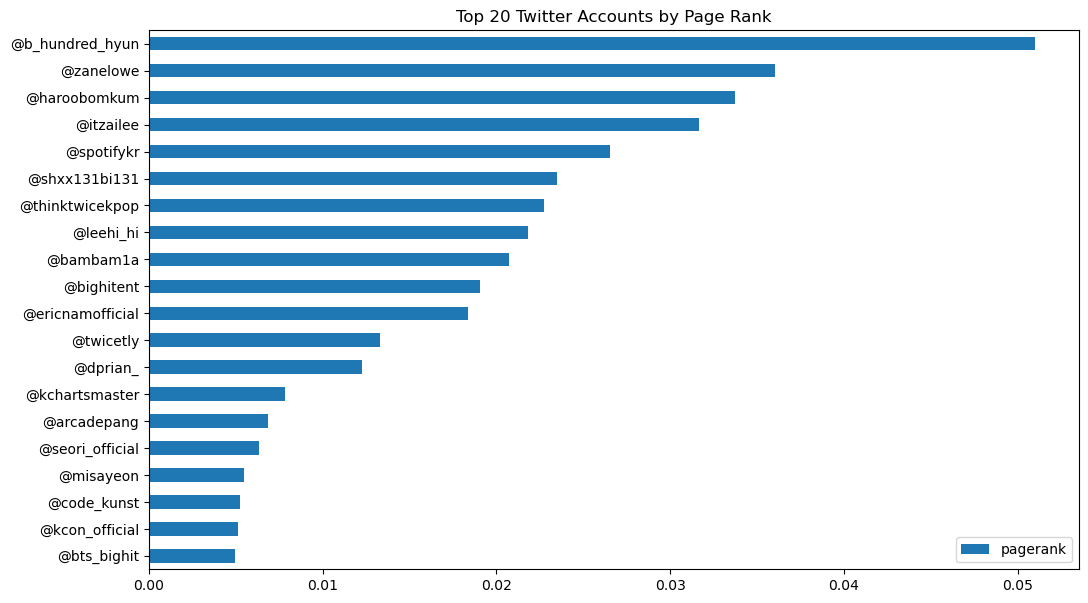

In [60]:
title = 'Top 20 Twitter Accounts by Page Rank' 

_= pagerank_df[0:20].plot.barh(title=title, figsize=(12,7)) 

plt.gca().invert_yaxis() 

# visualizing subgraphs

In [63]:
subgraph_nodes = pagerank_df[0:100].index.to_list() 
subgraph_nodes 

['@b_hundred_hyun',
 '@zanelowe',
 '@haroobomkum',
 '@itzailee',
 '@spotifykr',
 '@shxx131bi131',
 '@thinktwicekpop',
 '@leehi_hi',
 '@bambam1a',
 '@bighitent',
 '@ericnamofficial',
 '@twicetly',
 '@dprian_',
 '@kchartsmaster',
 '@arcadepang',
 '@seori_official',
 '@misayeon',
 '@code_kunst',
 '@kcon_official',
 '@bts_bighit',
 '@yubinofficial',
 '@bts_twt',
 '@miyaohyeah',
 '@blackpink',
 '@satgotloco',
 '@niziu__official',
 '@cube_ptg',
 '@applemusic',
 '@somi_official_',
 '@pledis_17',
 '@jp_dreamcatcher',
 '@got7official',
 '@shinsfriends',
 '@youtube',
 '@weareoneexo',
 '@ygofficialblink',
 '@bvndit_official',
 '@5redvelvet',
 '@yerinbaek',
 '@kpopggsuperior',
 '@official_yoon_',
 '@jaybumaom',
 '@itzyofficial',
 '@ljh__official',
 '@yginnercircle',
 '@spotify',
 '@enhypen',
 '@wjsn_cosmic',
 '@girlsgeneration',
 '@txt_members',
 '@heize_official',
 '@cubeclc',
 '@shfly3424',
 '@ab6ix',
 '@stray_kids',
 '@rbw_mamamoo',
 '@blobyblo',
 '@ateezofficial',
 '@jypetwice',
 '@rvsmtown',


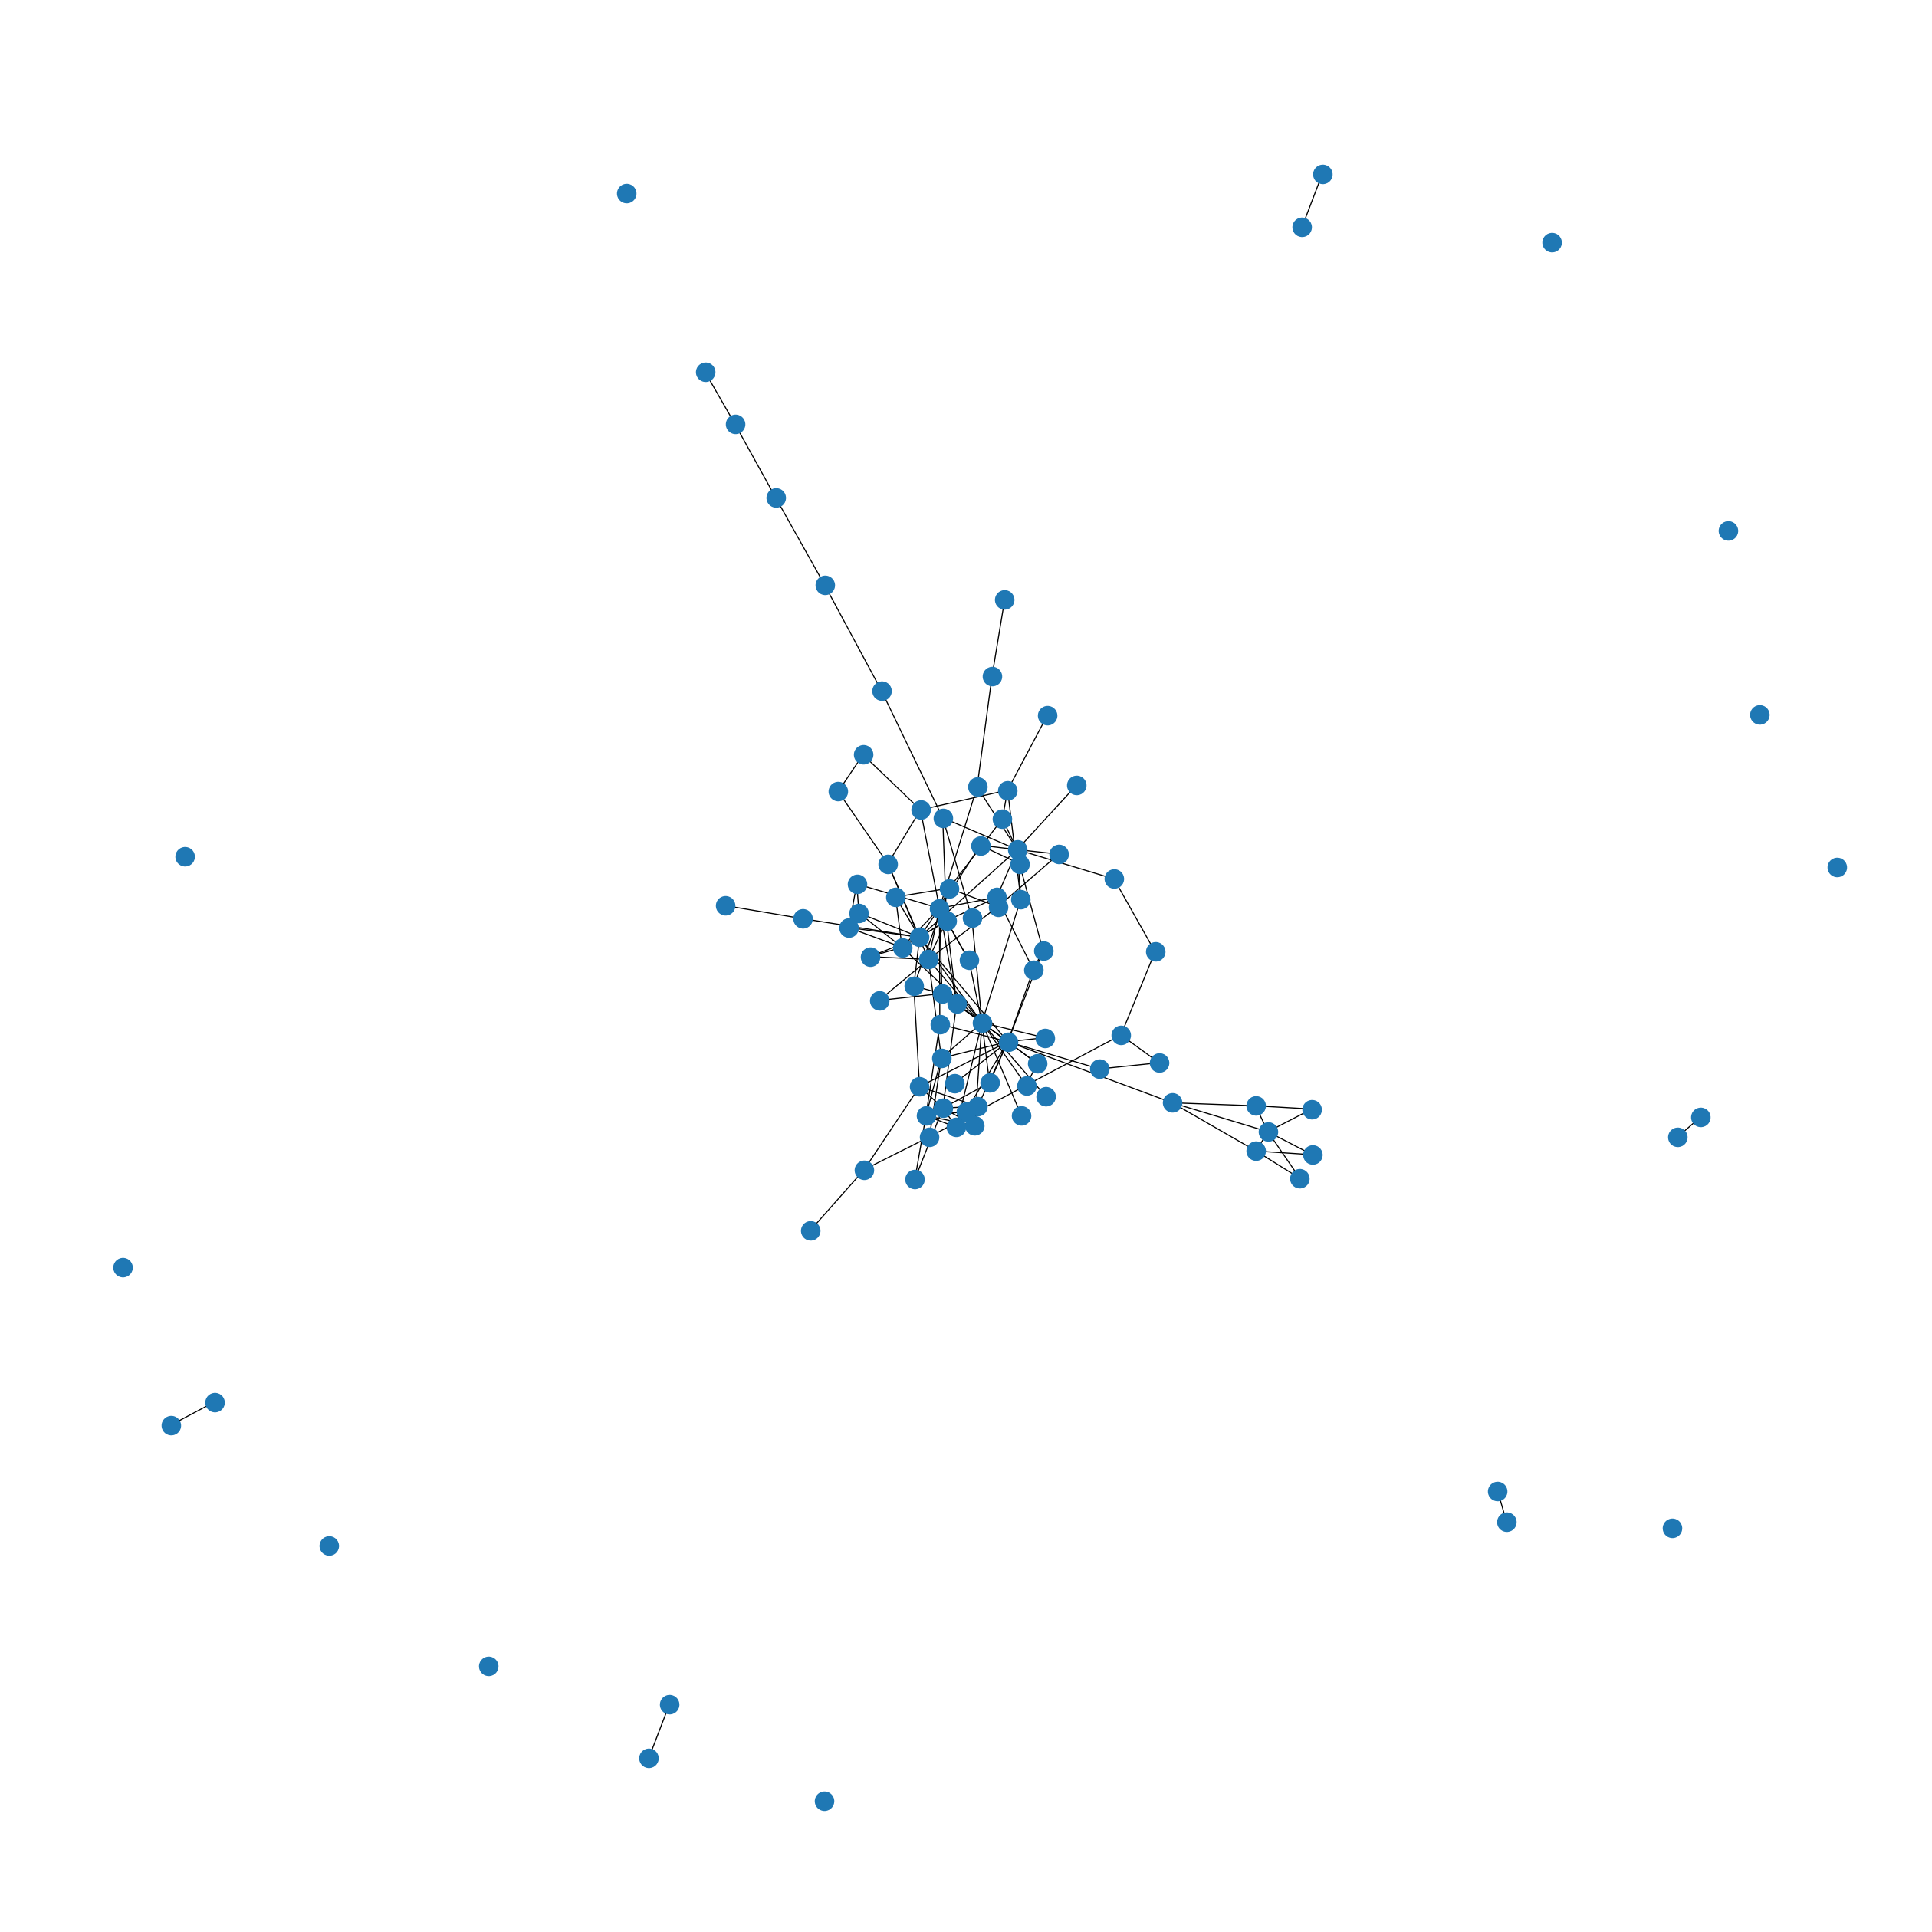

In [65]:
G_sub = G.subgraph(subgraph_nodes) 
plt.figure(figsize=(25,25)) 
nx.draw(G_sub)
plt.show()

/var/folders/sz/3pgn8fsd6v5g9t57hwhf_3sw0000gn/T/ipykernel_5633/1993881959.py:13: DeprecationWarning: 

The scipy.sparse array containers will be used instead of matrices
in Networkx 3.0. Use `to_scipy_sparse_array` instead.
  adjacency = nx.to_scipy_sparse_matrix(G, nodelist=None, dtype=None, weight='weight', format='csr')


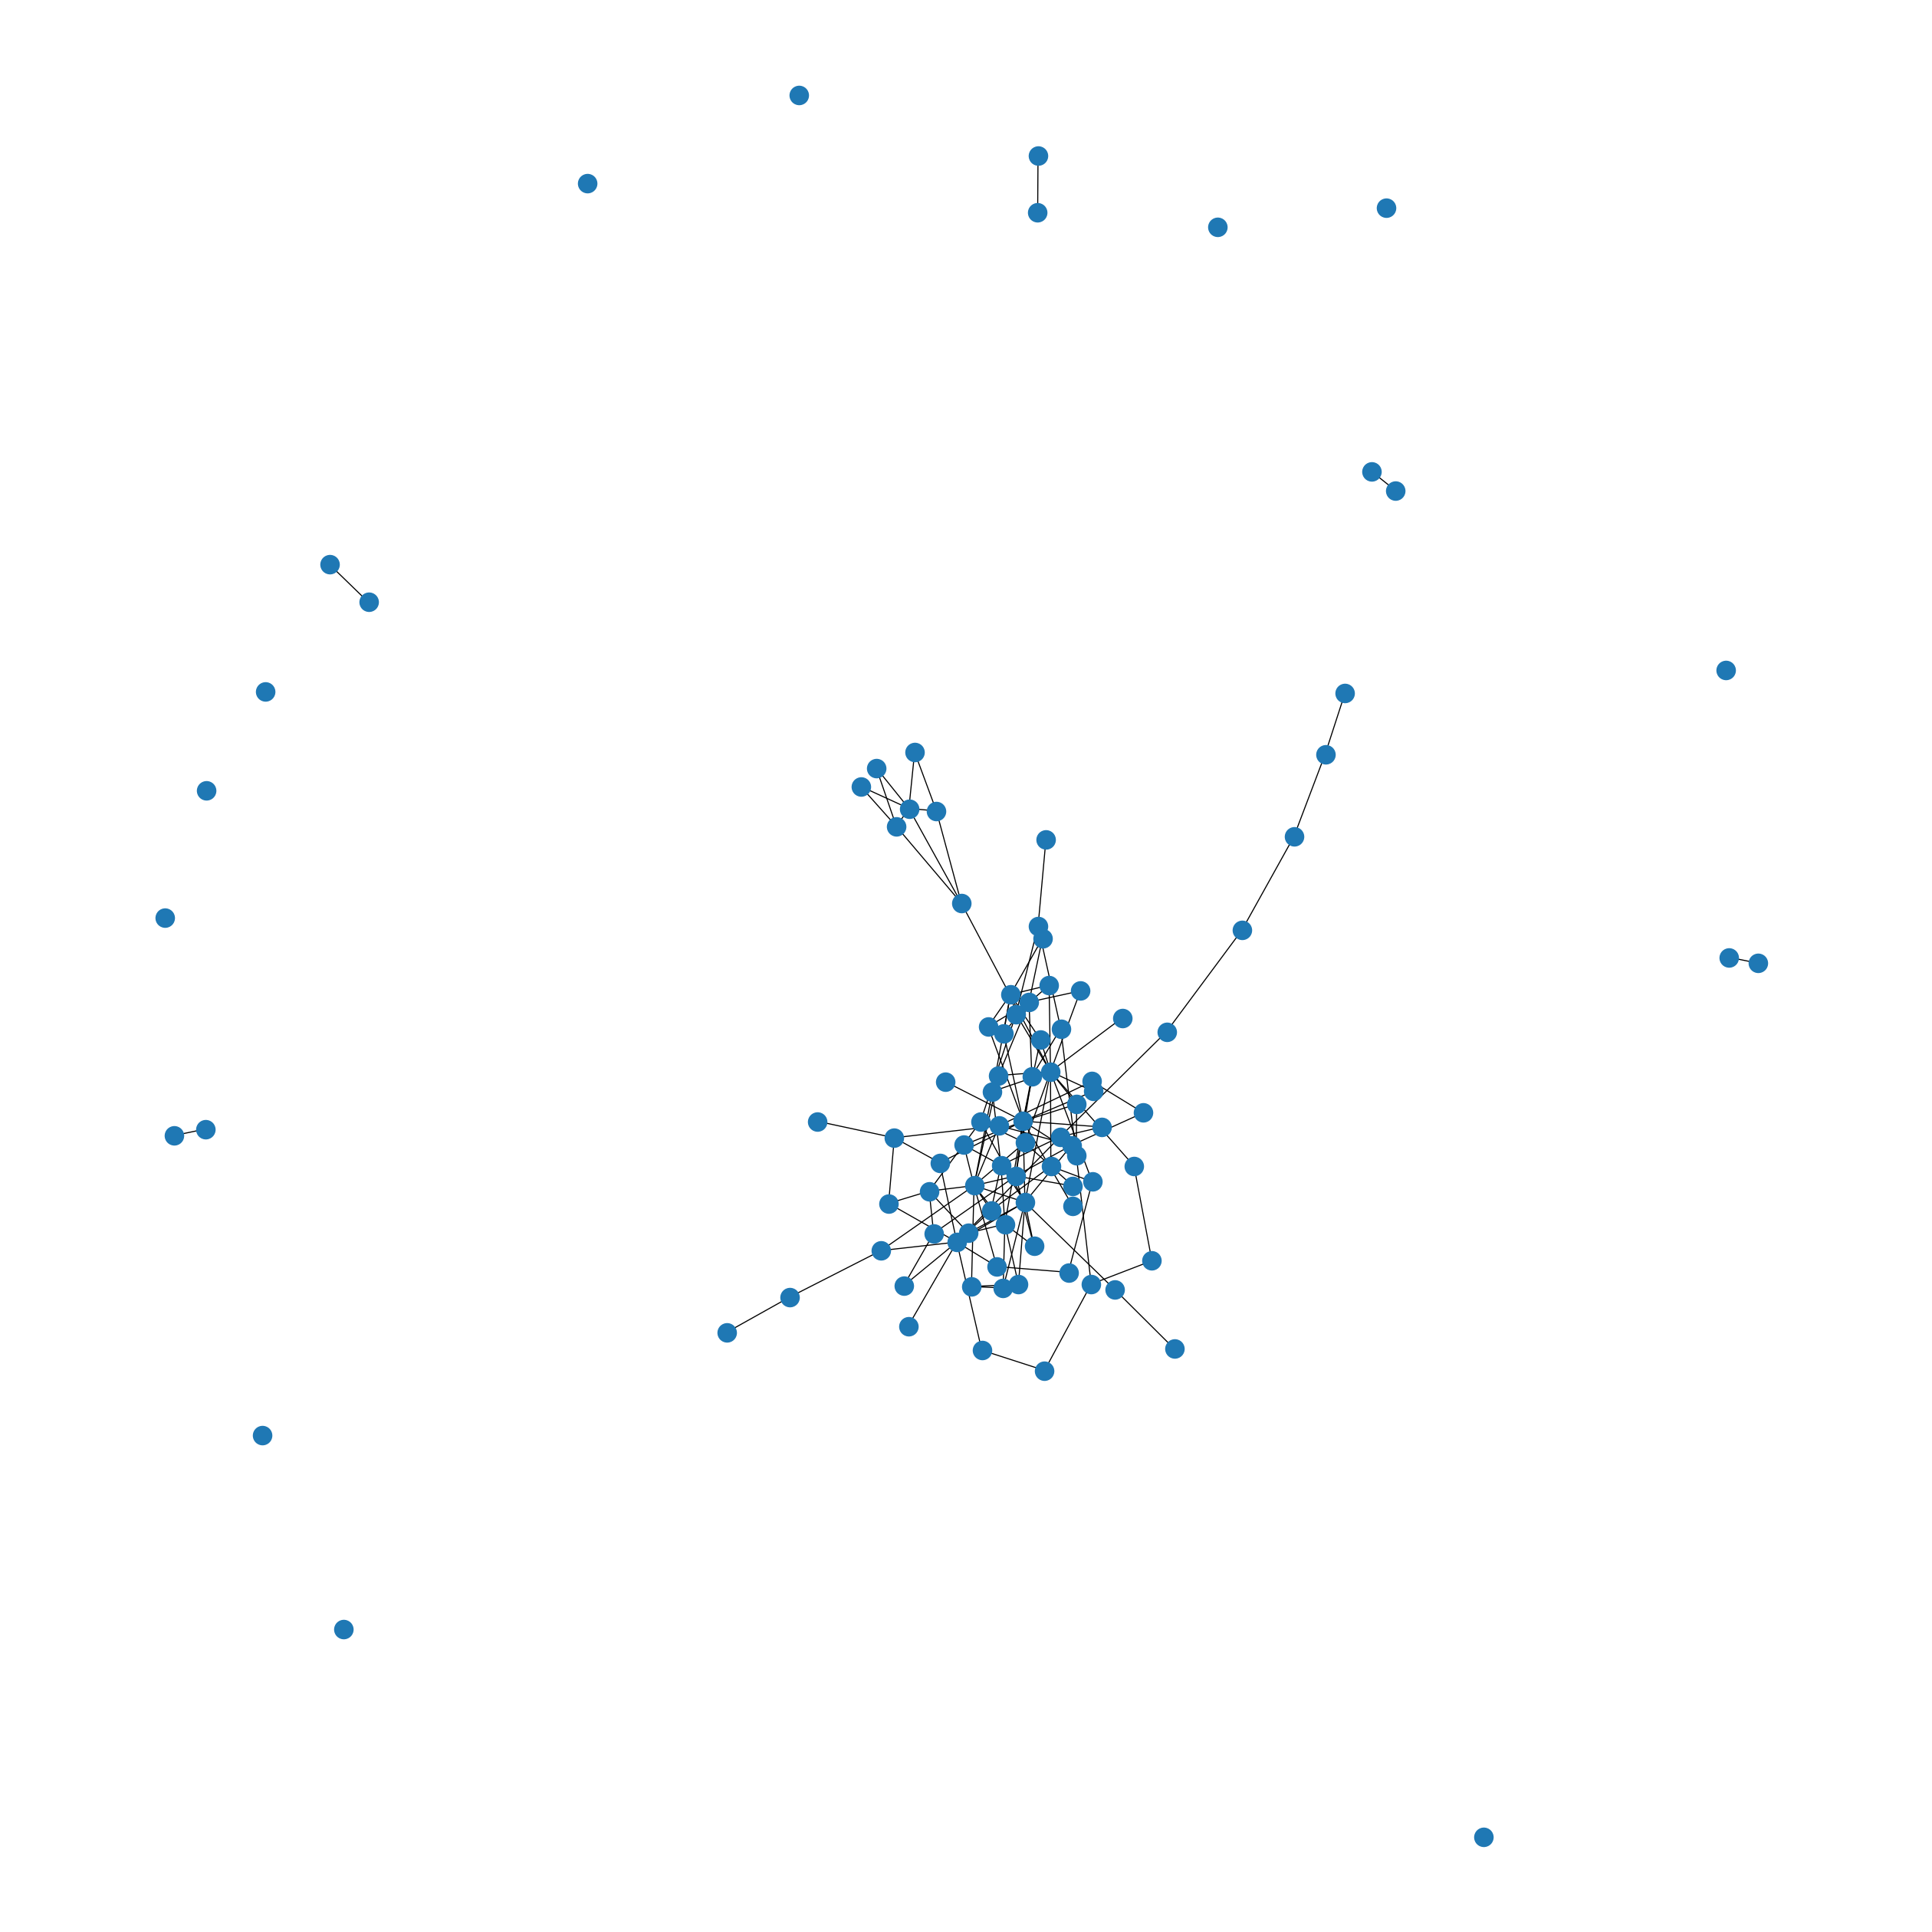

In [66]:
draw_graph(G_sub, node_size=3) 
plt.figure(figsize=(25,25)) 
nx.draw(G_sub)
plt.show()

# connected components

In [67]:
components = list(nx.connected_components(G)) 
len(components) 

15

In [68]:
for i in range(len(components)): 
    component_node_count = len(components[i]) 
    print('component {}: {}'.format(i, component_node_count)) 

component 0: 909
component 1: 2
component 2: 3
component 3: 4
component 4: 2
component 5: 2
component 6: 80
component 7: 129
component 8: 3
component 9: 7
component 10: 4
component 11: 4
component 12: 2
component 13: 10
component 14: 2


# bridges

In [69]:
list(nx.bridges(G)) 

[('@kmg3445t', '@code_kunst'),
 ('@code_kunst', '@highgrnd'),
 ('@code_kunst', '@youngjay_93'),
 ('@code_kunst', '@sobeompark'),
 ('@code_kunst', '@justhiseung'),
 ('@code_kunst', '@hwajilla'),
 ('@code_kunst', '@blobyblo'),
 ('@code_kunst', '@minddonyy'),
 ('@code_kunst', '@iuiive'),
 ('@code_kunst', '@eugenius887'),
 ('@code_kunst', '@tukutz81'),
 ('@code_kunst', '@migoivtitunes'),
 ('@code_kunst', '@nucksal'),
 ('@wgyenny', '@wondergirls'),
 ('@wondergirls', '@wg_lim'),
 ('@wg_lim', '@yubinofficial'),
 ('@haroobomkum', '@ericjracy'),
 ('@haroobomkum', '@nolza_xxi'),
 ('@haroobomkum', '@ryubae21'),
 ('@haroobomkum', '@rebellebomzi'),
 ('@haroobomkum', '@gyulokpocjinhwa'),
 ('@haroobomkum', '@seungrisoio'),
 ('@haroobomkum', '@made_for_tttops'),
 ('@haroobomkum', '@clprv'),
 ('@haroobomkum', '@twinkle_tisa'),
 ('@haroobomkum', '@haroodidi'),
 ('@haroobomkum', '@jjy82_stop'),
 ('@haroobomkum', '@nokiov'),
 ('@haroobomkum', '@kristinekwaknok'),
 ('@haroobomkum', '@mm_3058'),
 ('@haroobo

In [72]:
bridges = [s[0] for s in list(nx.bridges(G))] 
pd.Series(bridges).value_counts()[0:10] 

@b_hundred_hyun    127
@zanelowe           90
@haroobomkum        84
@itzailee           78
@spotifykr          60
@shxx131bi131       57
@leehi_hi           53
@thinktwicekpop     53
@bambam1a           49
@bighitent          46
dtype: int64

In [73]:
cut_bridges = pd.Series(bridges).value_counts()[0:10].index.to_list() 

G_bridge_cut = G.copy() 
G_bridge_cut.remove_nodes_from(cut_bridges) 

/var/folders/sz/3pgn8fsd6v5g9t57hwhf_3sw0000gn/T/ipykernel_5633/1993881959.py:13: DeprecationWarning: 

The scipy.sparse array containers will be used instead of matrices
in Networkx 3.0. Use `to_scipy_sparse_array` instead.
  adjacency = nx.to_scipy_sparse_matrix(G, nodelist=None, dtype=None, weight='weight', format='csr')


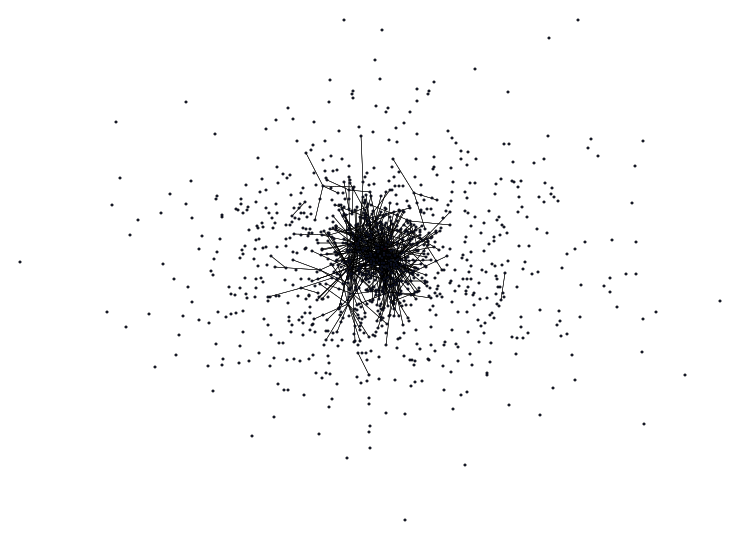

In [74]:
draw_graph(G_bridge_cut, show_names=False) 

In [111]:
import pandas as pd 
pagerank = nx.pagerank(G) 
pagerank_df = pd.DataFrame(pagerank, index=[0]).T 
pagerank_df.columns = ['pagerank'] 
pagerank_df.sort_values('pagerank', inplace=True, ascending=False) 
pagerank_df.head(20) 

pagerank
Valjean           0.075434
Myriel            0.042803
Gavroche          0.035764
Marius            0.030893
Javert            0.030303
Thenardier        0.027926
Fantine           0.027022
Enjolras          0.021880
Cosette           0.020611
MmeThenardier     0.019501
Bossuet           0.018957
Courfeyrac        0.018576
Eponine           0.017793
Mabeuf            0.017476
Joly              0.017197
Bahorel           0.017197
Gueulemer         0.016691
Babet             0.016691
Claquesous        0.016561
MlleGillenormand  0.016260

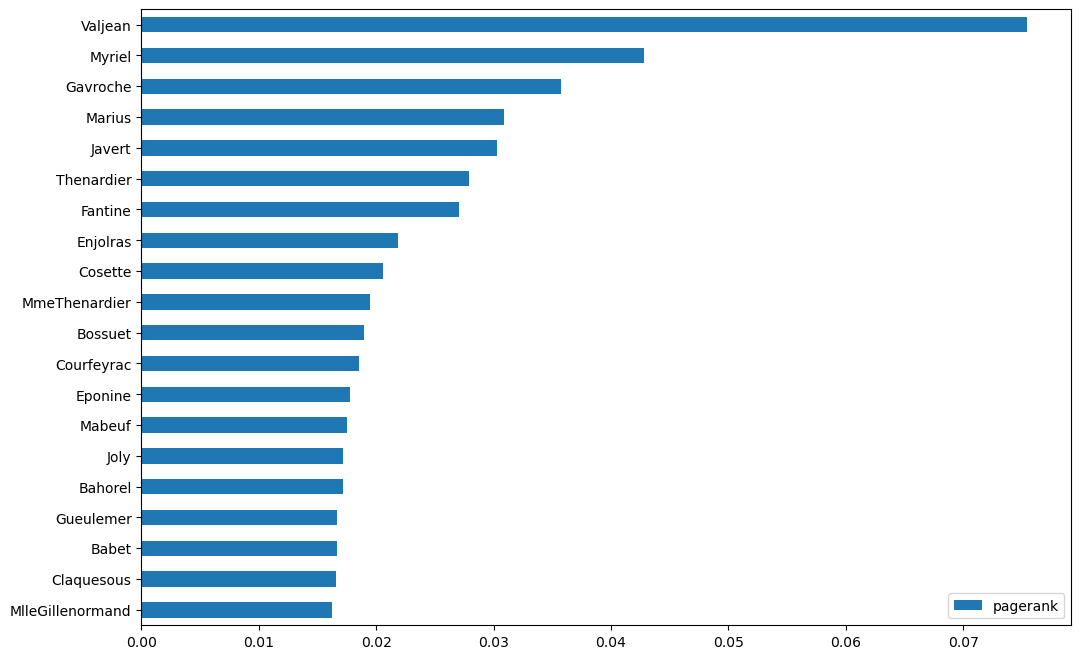

In [112]:
pagerank_df.head(20).plot.barh(figsize=(12,8)).invert_yaxis() 

In [81]:
ego_1 = nx.ego_graph(G, 'Valjean') 

/var/folders/sz/3pgn8fsd6v5g9t57hwhf_3sw0000gn/T/ipykernel_5633/1993881959.py:13: DeprecationWarning: 

The scipy.sparse array containers will be used instead of matrices
in Networkx 3.0. Use `to_scipy_sparse_array` instead.
  adjacency = nx.to_scipy_sparse_matrix(G, nodelist=None, dtype=None, weight='weight', format='csr')


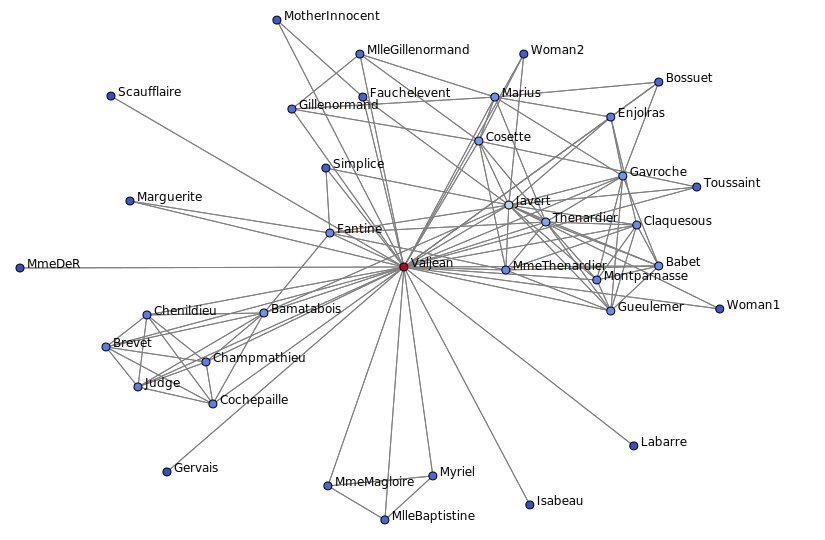

In [82]:
draw_graph(ego_1, font_size=12, show_names=True, node_size=4, edge_width=1) 

In [113]:
degcent = nx.degree_centrality(ego_1) 
degcent_df = pd.DataFrame(degcent, index=[0]).T 
degcent_df.columns = ['degree_centrality'] 
degcent_df.sort_values('degree_centrality', inplace=True, ascending=False) 
degcent_df.head(10) 

degree_centrality
Javert                  0.457143
Thenardier              0.285714
Cosette                 0.228571
Gavroche                0.228571
Babet                   0.200000
MmeThenardier           0.200000
Gueulemer               0.200000
Marius                  0.200000
Bamatabois              0.200000
Claquesous              0.200000

In [114]:
degcent = nx.degree_centrality(ego_3) 
degcent_df = pd.DataFrame(degcent, index=[0]).T 
degcent_df.columns = ['degree_centrality'] 
degcent_df.sort_values('degree_centrality', inplace=True, ascending=False) 
degcent_df.head(10) 

degree_centrality
Enjolras             0.619048
Bossuet              0.571429
Joly                 0.523810
Bahorel              0.523810
Courfeyrac           0.523810
Combeferre           0.476190
Feuilly              0.476190
Marius               0.476190
Grantaire            0.428571
Valjean              0.380952